# Business Challenge: Cohort Analysis for Ironhack Payments (Project 1)
Ginosca Alejandro, Dan Bigman, Paola Rivera, Natanael Santiago

## Project Overview
In this project, you will conduct a comprehensive cohort analysis based on data provided by IronHack Payments. The main objective is to analyze user cohorts defined by the month of creation of their first cash advance. You will track the monthly evolution of key metrics for these cohorts, enabling IronHack Payments to gain valuable insights into user behavior and the performance of their financial services.

In [124]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

First, we load the csv files as pandas dataframes

In [125]:
cash_request_path = r'project_dataset\extract - cash request - data analyst.csv'
fees_path = r'project_dataset\extract - fees - data analyst - .csv'




cash_request_df = pd.read_csv(cash_request_path)
fees_df = pd.read_csv(fees_path)



### Data exploration

#### Cash Requests
We begin by exploring the cash request table

In [126]:
display(cash_request_df.head())
display(cash_request_df.info())
display(cash_request_df.describe())

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

None

,id,amount,user_id,deleted_account_id
count,23970.000000,23970.000000,21867.000000,2104.000000
mean,13910.966124,82.720818,32581.250789,9658.755228
std,7788.117214,26.528065,27618.565773,7972.743249
min,3.000000,1.000000,34.000000,91.000000
25%,7427.250000,50.000000,10804.000000,3767.000000
50%,14270.500000,100.000000,23773.000000,6121.500000
75%,20607.750000,100.000000,46965.000000,16345.000000
max,27010.000000,200.000000,103719.000000,30445.000000


`cash.head()` shows us the columns in the table as well as the first 5 elements. We observe that there are many data types in this table as well as many NaN's, mainly on dates. 

`cash.info()` shows us more information. The table contains 23970 entries, from 0 to 23969. We also observe the data type for each column and NaN's per column. Columns `id`, `amount`, `status`, `created_at`, `updated_at`,  `reimbursement_date`, and ` transfer_type` do not contain empty values.

`cash.describe()` does not provide us with much relevant information, except for the `amount` column. 

To continue understanding the data, we then observe the categorical values in  the `transfer_type` and `status` columns and the ocurrences for each value. 

In [127]:
display(cash_request_df["transfer_type"].value_counts())

display(cash_request_df["status"].value_counts())

transfer_type
instant    13882
regular    10088
Name: count, dtype: int64

status
money_back               16397
rejected                  6568
direct_debit_rejected      831
active                      59
transaction_declined        48
direct_debit_sent           34
canceled                    33
Name: count, dtype: int64

The [Excel sheet included with the .csv's](/project_dataset/Lexique%20-%20Data%20Analyst.xlsx) includes a description for the columns. In it, it specifies that the `deleted_account_id`, "if a user delete their account, we are replacing the user_id by this id. It corresponds to a unique ID in the deleted account table with some keys information saved for fraud-fighting purposes (while respecting GDPR regulation)". Since there were NaN's in the `user_id` field, we revise if these mising values are users who deleted their account. 


In [128]:
print("Users with deleted accounts:",cash_request_df["deleted_account_id"].nunique())
print("Users with active account: ",cash_request_df["user_id"].nunique())
print("Total users: ", cash_request_df["user_id"].nunique()+cash_request_df["deleted_account_id"].nunique())

print("\nIs there actually a transaction without a user id?")

display(cash_request_df["user_id"].isna().value_counts())
display(cash_request_df["deleted_account_id"].isna().value_counts())

print("Values between user id and deleted user id are incongruent by 1")

cond3 = (cash_request_df["user_id"].notna()) & (cash_request_df["deleted_account_id"].notna())
display(cash_request_df[cond3][["user_id", "deleted_account_id"]])

print("one user has user_id and deleted_account_id")

Users with deleted accounts: 1141
Users with active account:  10798
Total users:  11939

Is there actually a transaction without a user id?


user_id
False    21867
True      2103
Name: count, dtype: int64

deleted_account_id
True     21866
False     2104
Name: count, dtype: int64

Values between user id and deleted user id are incongruent by 1


,user_id,deleted_account_id
7313,3161.0,262.0


one user has user_id and deleted_account_id


We check all the user ids and deleted user ids by counting them once. There are less users than lines in the table, so this lets us know that there are various users who have requested cash more than once. 

When comparing NaN's between `user_id` and `deleted_account_id`, we observe that the missing `user_id`s are almost the same as the `deleted_account_id`, and vice versa, except for one value. There is a user that has both `user_id` and `deleted_account_id`. We did not delete this value because it does not affect with the cohorts "creation".


#### Fees
Now, exploring the fees dataframe, we observe the first 5 lines in the table with its columns. We also see its info to know if there are NaNs and in which columns. `id`, `type`, `status`, `total_amount`, `reason`, `created_at`, and `updated_at` do not have NaNs. `cash_request_id` has 4 NaNs, and we need this column to join it with the cash request table. When merged, these 4 lines will not be considered. 

In [129]:
display(fees_df.head())
display(fees_df.info())

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


None

================ DATA OVERVIEW ================
Shape of DataFrame: (23970, 16)

First 5 Rows:
     id  amount    status                     created_at  \
0     5   100.0  rejected  2019-12-10 19:05:21.596873+00   
1    70   100.0  rejected   2019-12-10 19:50:12.34778+00   
2     7   100.0  rejected   2019-12-10 19:13:35.82546+00   
3    10    99.0  rejected  2019-12-10 19:16:10.880172+00   
4  1594   100.0  rejected  2020-05-06 09:59:38.877376+00   

                      updated_at  user_id                   moderated_at  \
0   2019-12-11 16:47:42.40783+00    804.0  2019-12-11 16:47:42.405646+00   
1  2019-12-11 14:24:22.900054+00    231.0  2019-12-11 14:24:22.897988+00   
2  2019-12-11 09:46:59.779773+00    191.0  2019-12-11 09:46:59.777728+00   
3  2019-12-18 14:26:18.136163+00    761.0  2019-12-18 14:26:18.128407+00   
4   2020-05-07 09:21:55.34008+00   7686.0  2020-05-07 09:21:55.320193+00   

   deleted_account_id             reimbursement_date  \
0                 NaN  2020-01-

C:\Users\dbigman\AppData\Local\Temp\ipykernel_11012\393220646.py:93: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temp = pd.to_datetime(df[col], errors='coerce')


Column 'moderated_at': Successfully parsed, 8058 invalid dates.
Column 'reimbursement_date': Successfully parsed, 20920 invalid dates.
Column 'cash_request_received_date': Successfully parsed, 7681 invalid dates.
Column 'money_back_date': Successfully parsed, 11930 invalid dates.
Column 'transfer_type': Not a valid datetime field.
Column 'send_at': Successfully parsed, 7504 invalid dates.
Column 'recovery_status': Not a valid datetime field.


C:\Users\dbigman\AppData\Local\Temp\ipykernel_11012\393220646.py:93: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temp = pd.to_datetime(df[col], errors='coerce')
C:\Users\dbigman\AppData\Local\Temp\ipykernel_11012\393220646.py:93: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temp = pd.to_datetime(df[col], errors='coerce')


Column 'reco_creation': Successfully parsed, 20640 invalid dates.
Column 'reco_last_update': Successfully parsed, 20640 invalid dates.

================ VISUALIZATIONS ================
Visualizing missing data...


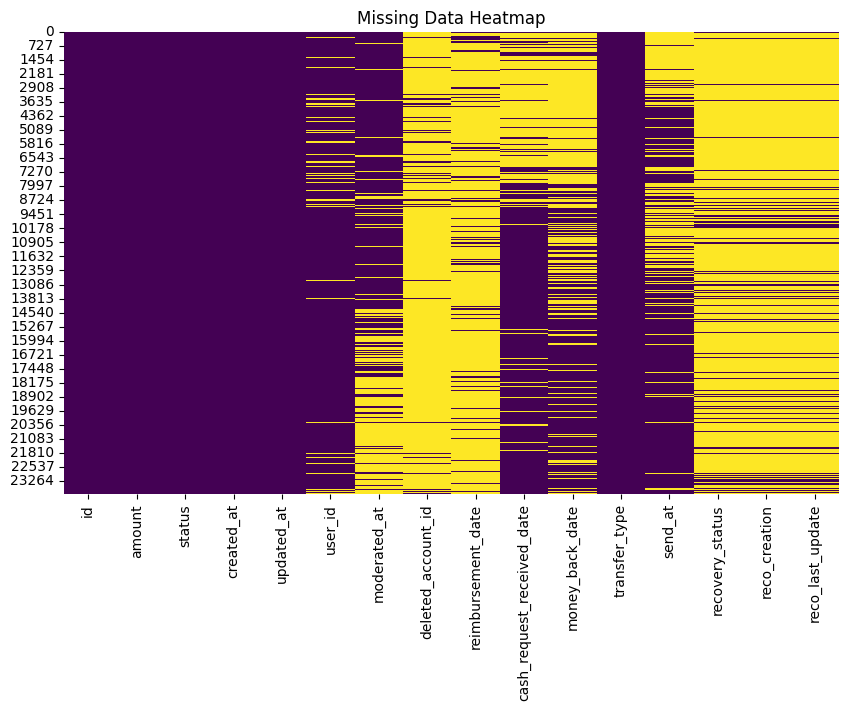

Visualizing correlation matrix...


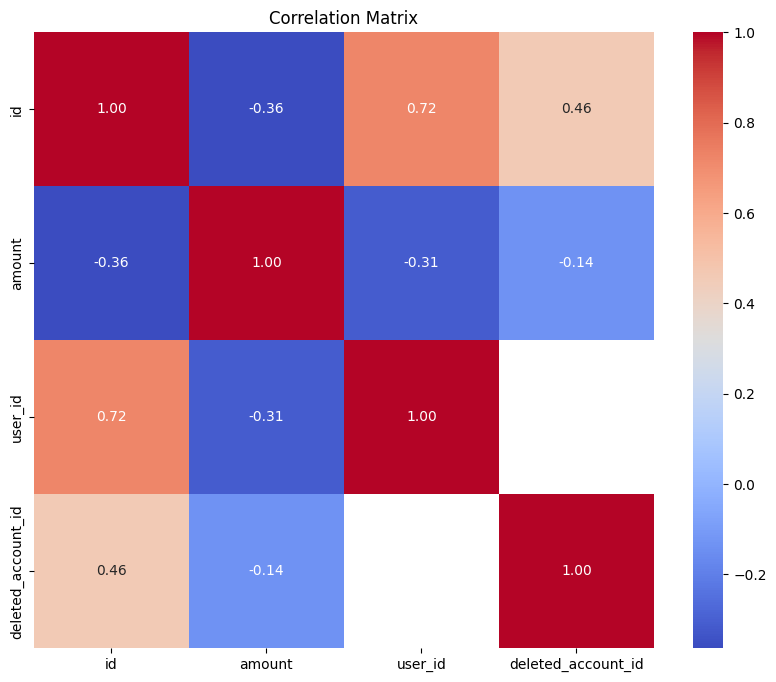

Visualizing distributions of numerical columns...


c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


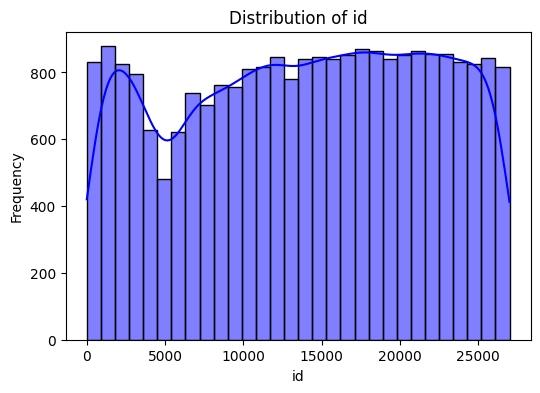

c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


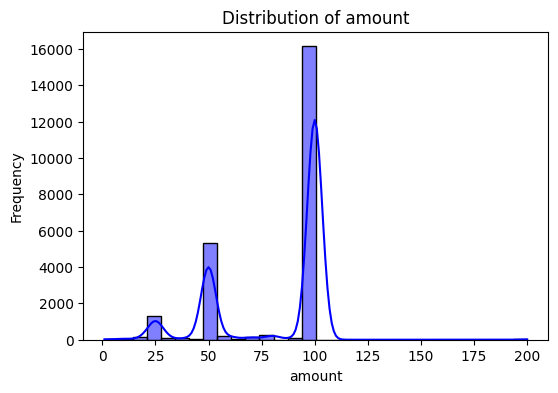

c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


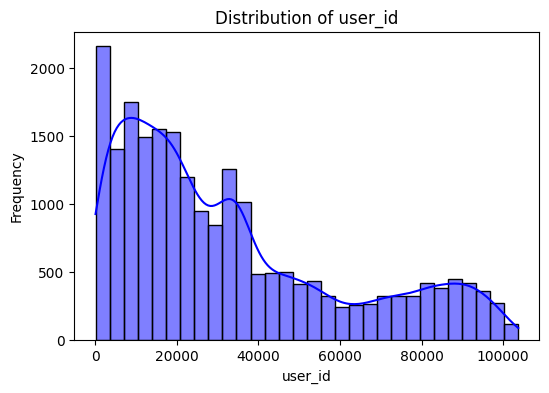

c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


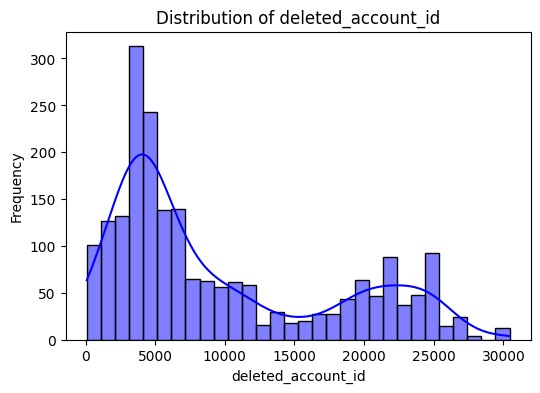

c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Visualizing boxplots for outlier detection...


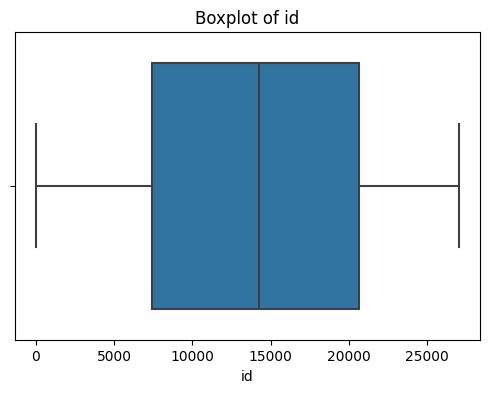

c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


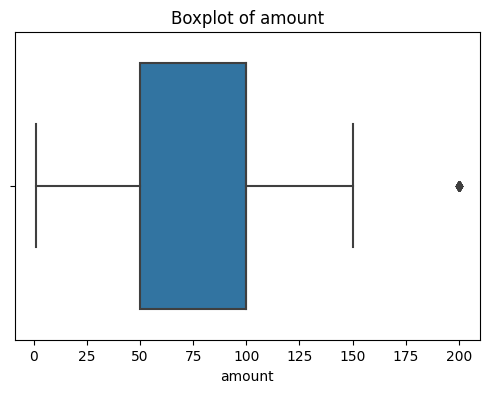

c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


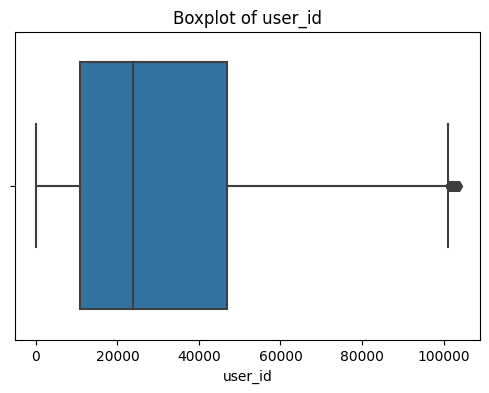

c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


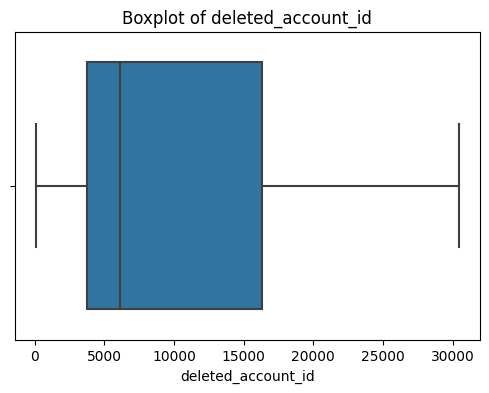

c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Visualizing top categories for categorical columns...


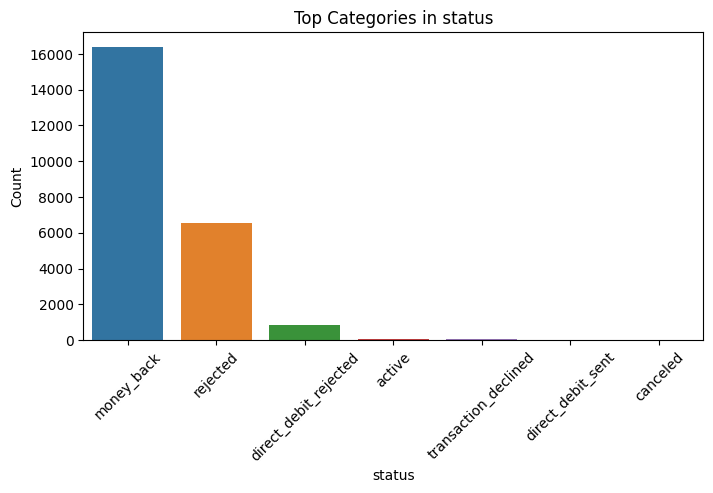

c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


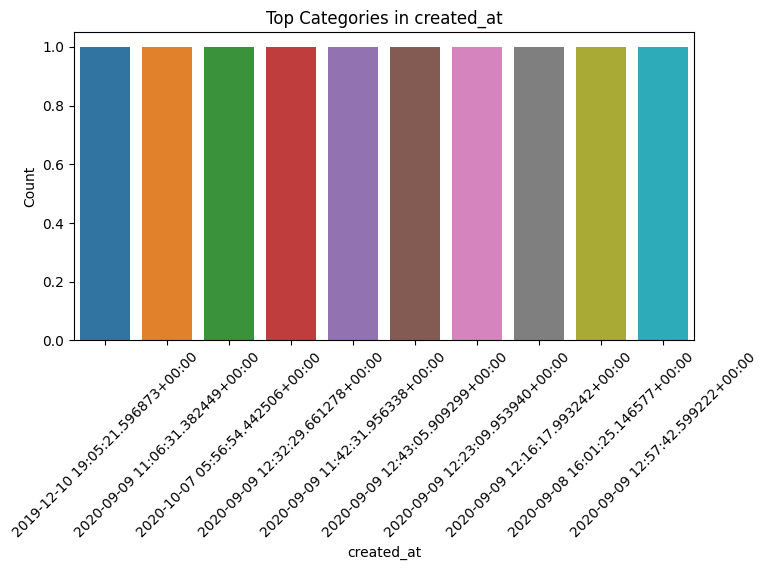

c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


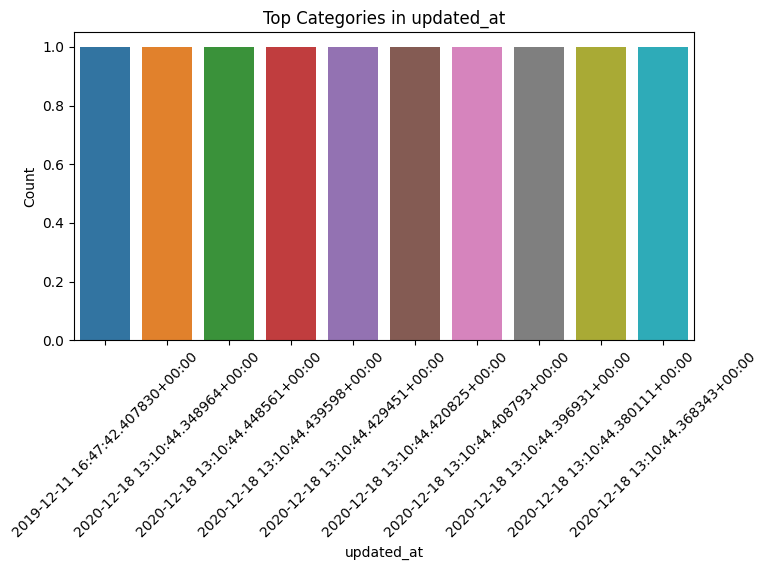

c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


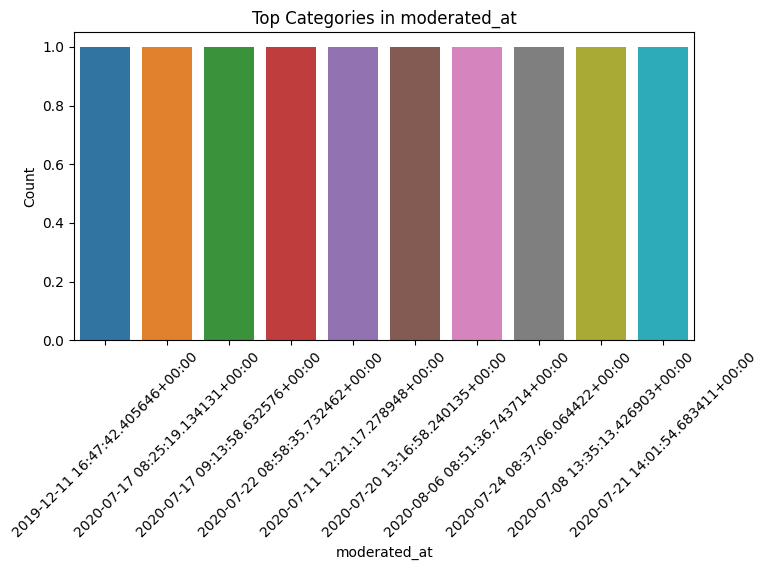

c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


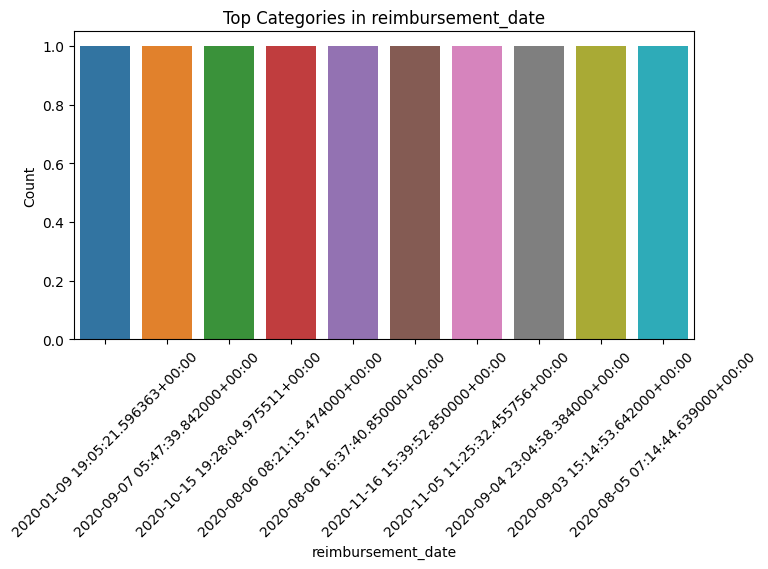

c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


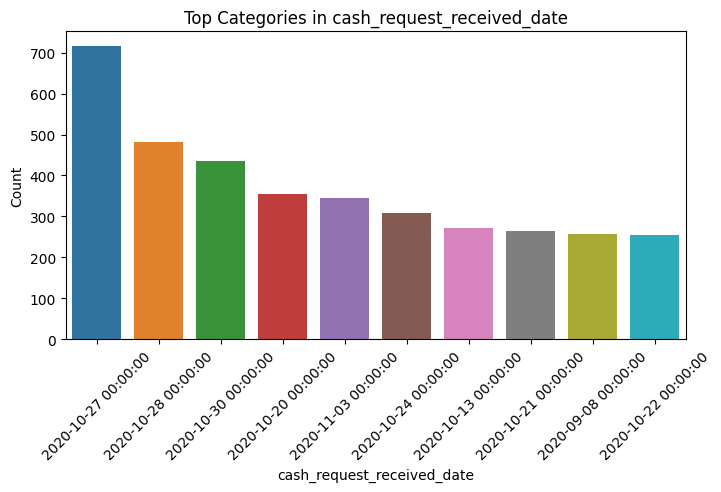

c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


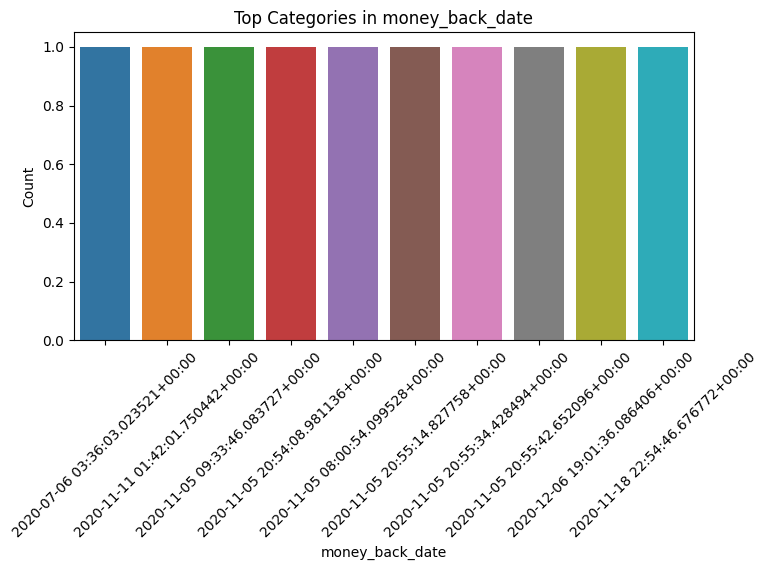

c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


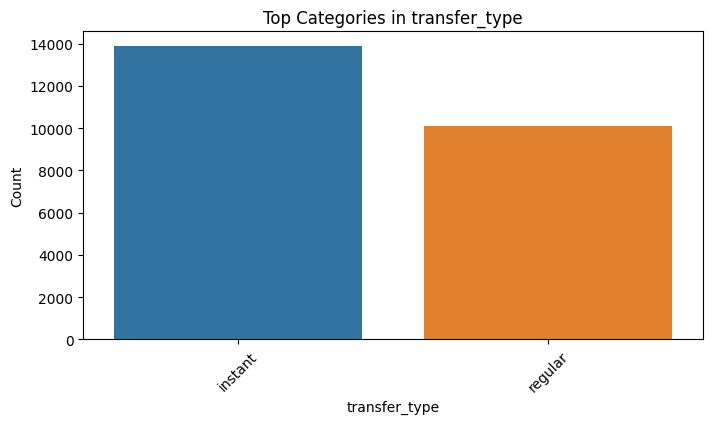

c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


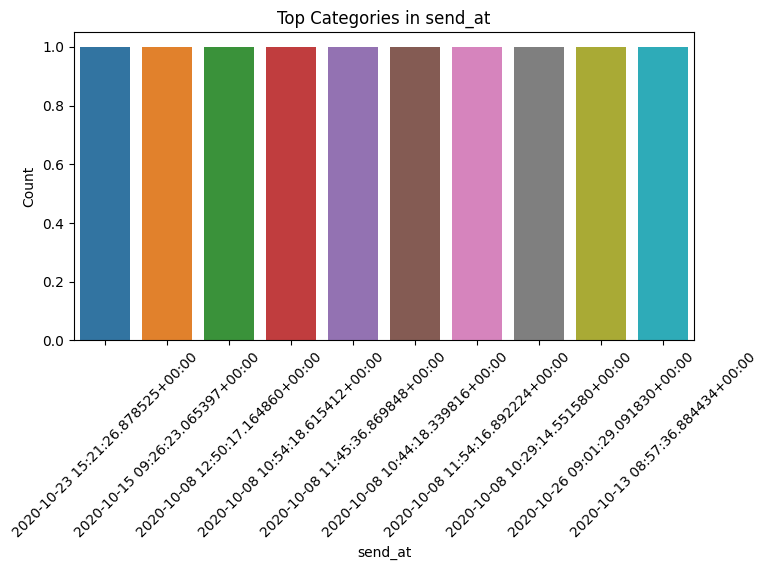

c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


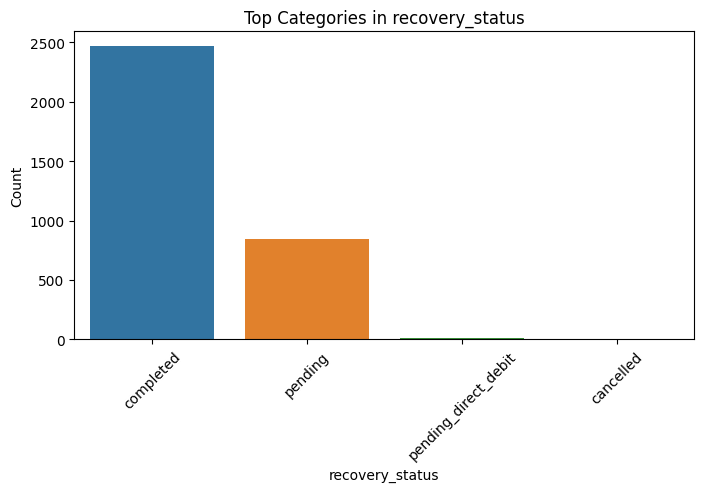

c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


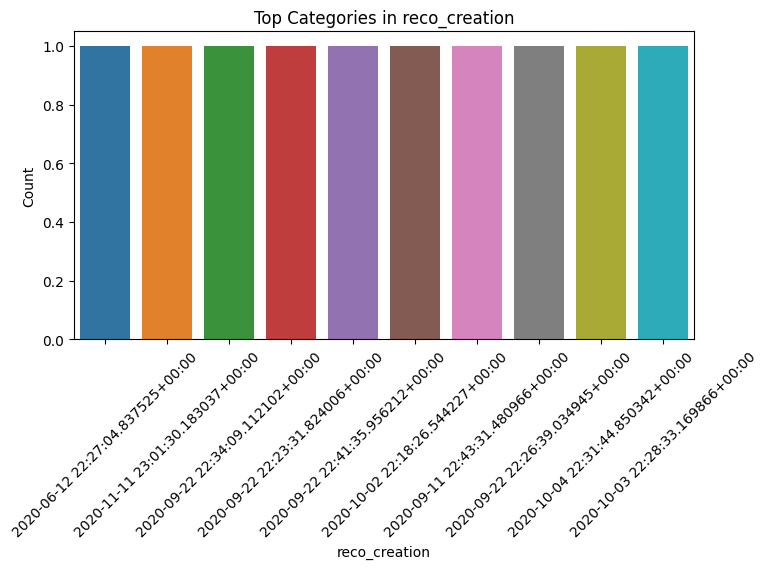

c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


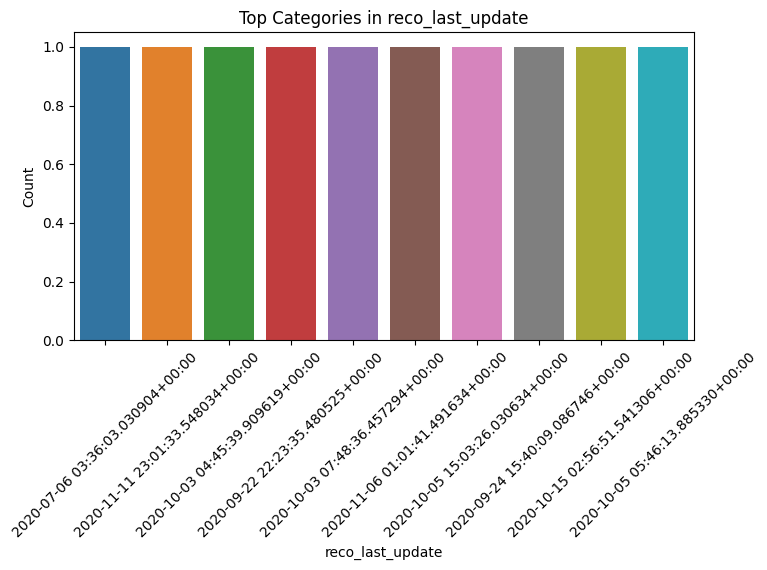


================ EDA COMPLETE ================


In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

def quick_eda(
    df,
    sample_size=100000,
    show_plots=True,
    show_distributions=True,
    show_boxplots=True,
    show_categorical_plots=True,
    target=None,
    date_columns=None
):
    """
    Perform exploratory data analysis on a pandas DataFrame.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        sample_size (int): If the DataFrame is larger than this number,
                           it will be sampled down for EDA.
        show_plots (bool): Whether to display plots.
        show_distributions (bool): Whether to plot distributions of numeric columns.
        show_boxplots (bool): Whether to plot boxplots for numeric columns.
        show_categorical_plots (bool): Whether to visualize top categories for categorical columns.
        target (str): The name of the target column (if available) for correlation analysis.
        date_columns (list): List of columns that are known to be datetime fields. 
                             If provided, only these columns will be attempted to convert to datetime.

    Returns:
        None: Displays results and visualizations.
    """

    # Handle large datasets by sampling
    if len(df) > sample_size:
        print(f"DataFrame is large ({len(df)} rows). Displaying analysis on a {sample_size} row sample.")
        df = df.sample(sample_size, random_state=42)

    print("================ DATA OVERVIEW ================")
    print(f"Shape of DataFrame: {df.shape}")
    print("\nFirst 5 Rows:")
    print(df.head())

    print("\n================ DATA INFO ================")
    df.info()

    print("\n================ MISSING DATA ================")
    missing_count = df.isnull().sum()
    missing_percent = (missing_count / len(df)) * 100
    print(pd.DataFrame({"Missing Count": missing_count, "Missing %": missing_percent}))

    print("\n================ DUPLICATE ROWS ================")
    duplicate_count = df.duplicated().sum()
    print(f"Total duplicate rows: {duplicate_count}")

    # Numerical summary
    numeric_cols = df.select_dtypes(include=['number'])
    print("\n================ COLUMN STATISTICS ================")
    print("\nNumerical Summary:")
    if not numeric_cols.empty:
        print(numeric_cols.describe())
    else:
        print("No numerical columns found.")

    # Skewness and Kurtosis
    if not numeric_cols.empty:
        print("\nSkewness and Kurtosis of Numerical Columns:")
        for col in numeric_cols.columns:
            print(f"{col}: Skewness={df[col].skew():.2f}, Kurtosis={df[col].kurt():.2f}")

    # categorical summary
    categorical_cols = df.select_dtypes(include=['object']).columns
    print("\nCategorical Summary:")
    if len(categorical_cols) > 0:
        for col in categorical_cols:
            print(f"\nColumn: {col}")
            print(df[col].value_counts())
    else:
        print("No categorical columns found.")

    print("\n================ DATE VERIFICATION ================")
    # convert to datetime if columns are known or attempt automatically if not provided
    if date_columns is not None:
        # Only convert columns provided
        for col in date_columns:
            if col in df.columns:
                df[col] = pd.to_datetime(df[col], errors='coerce')
                invalid_dates = df[col].isna().sum()
                print(f"Column '{col}': Successfully parsed, {invalid_dates} invalid dates.")
    else:
        # Attempt to parse all object columns as dates
        object_cols = df.select_dtypes(include=['object']).columns
        for col in object_cols:
            temp = pd.to_datetime(df[col], errors='coerce')
            invalid_dates = temp.isna().sum()
            if invalid_dates < len(df):  # Means some valid dates were found
                df[col] = temp
                print(f"Column '{col}': Successfully parsed, {invalid_dates} invalid dates.")
            else:
                print(f"Column '{col}': Not a valid datetime field.")

    # Correlation with target if provided
    if target is not None and target in df.columns and not numeric_cols.empty:
        print("\n================ CORRELATION WITH TARGET ================")
        correlations = df.corr(numeric_only=True)[target].sort_values(ascending=False)
        print(correlations)

    if show_plots:
        print("\n================ VISUALIZATIONS ================")

        # Missing Data Heatmap
        print("Visualizing missing data...")
        plt.figure(figsize=(10, 6))
        sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
        plt.title("Missing Data Heatmap")
        plt.show()

        # Correlation Heatmap for Numerical Columns
        if not numeric_cols.empty:
            print("Visualizing correlation matrix...")
            plt.figure(figsize=(10, 8))
            corr_matrix = numeric_cols.corr()
            sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
            plt.title("Correlation Matrix")
            plt.show()

        # Distribution of Numerical Columns
        if show_distributions and not numeric_cols.empty:
            print("Visualizing distributions of numerical columns...")
            for col in numeric_cols.columns:
                plt.figure(figsize=(6, 4))
                sns.histplot(df[col], kde=True, bins=30, color='blue')
                plt.title(f"Distribution of {col}")
                plt.xlabel(col)
                plt.ylabel("Frequency")
                plt.show()

        # Boxplots for Outlier Detection
        if show_boxplots and not numeric_cols.empty:
            print("Visualizing boxplots for outlier detection...")
            for col in numeric_cols.columns:
                plt.figure(figsize=(6, 4))
                sns.boxplot(x=df[col])
                plt.title(f"Boxplot of {col}")
                plt.xlabel(col)
                plt.show()

        # Categorical Column Visualization
        if show_categorical_plots and len(categorical_cols) > 0:
            print("Visualizing top categories for categorical columns...")
            for col in categorical_cols:
                top_values = df[col].value_counts().head(10)
                plt.figure(figsize=(8,4))
                sns.barplot(x=top_values.index, y=top_values.values)
                plt.title(f"Top Categories in {col}")
                plt.xticks(rotation=45)
                plt.xlabel(col)
                plt.ylabel("Count")
                plt.show()

    print("\n================ EDA COMPLETE ================")


quick_eda(cash_request_df)


C:\Users\dbigman\AppData\Local\Temp\ipykernel_11012\199739046.py:54: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['cohort'] = df['created_at'].dt.to_period('M').astype(str)


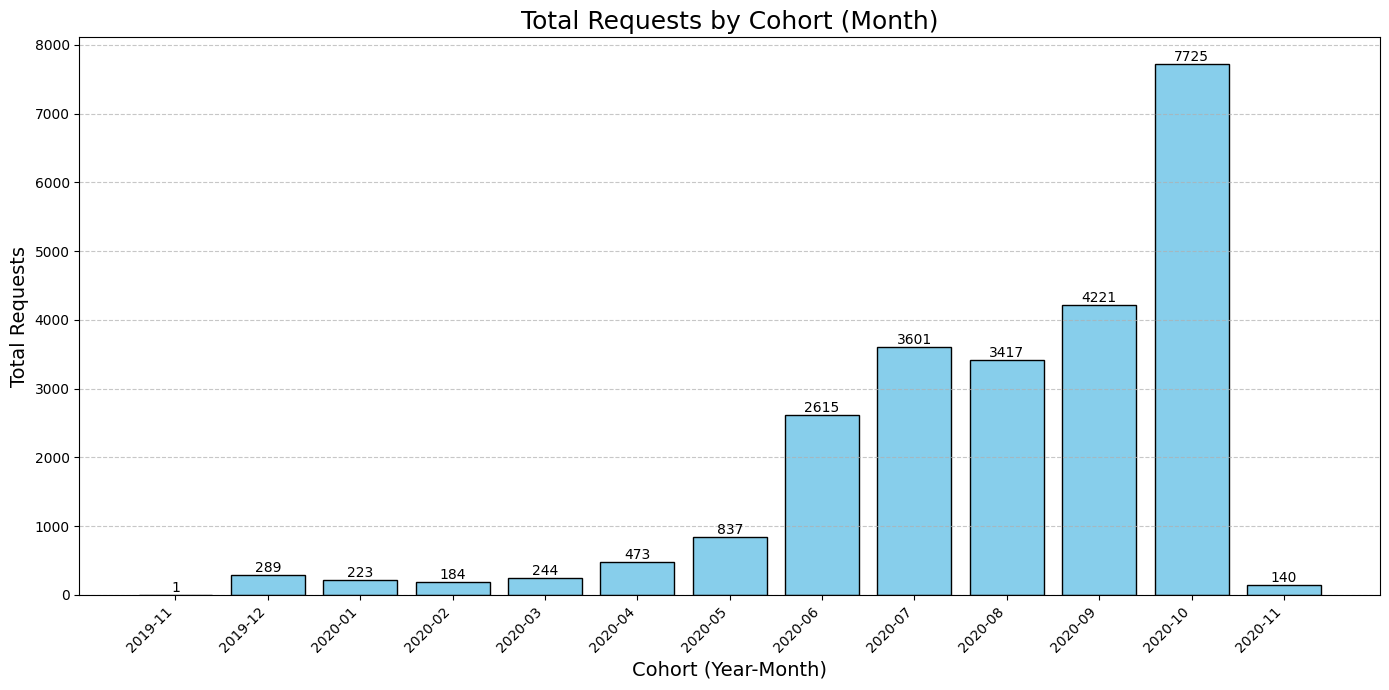

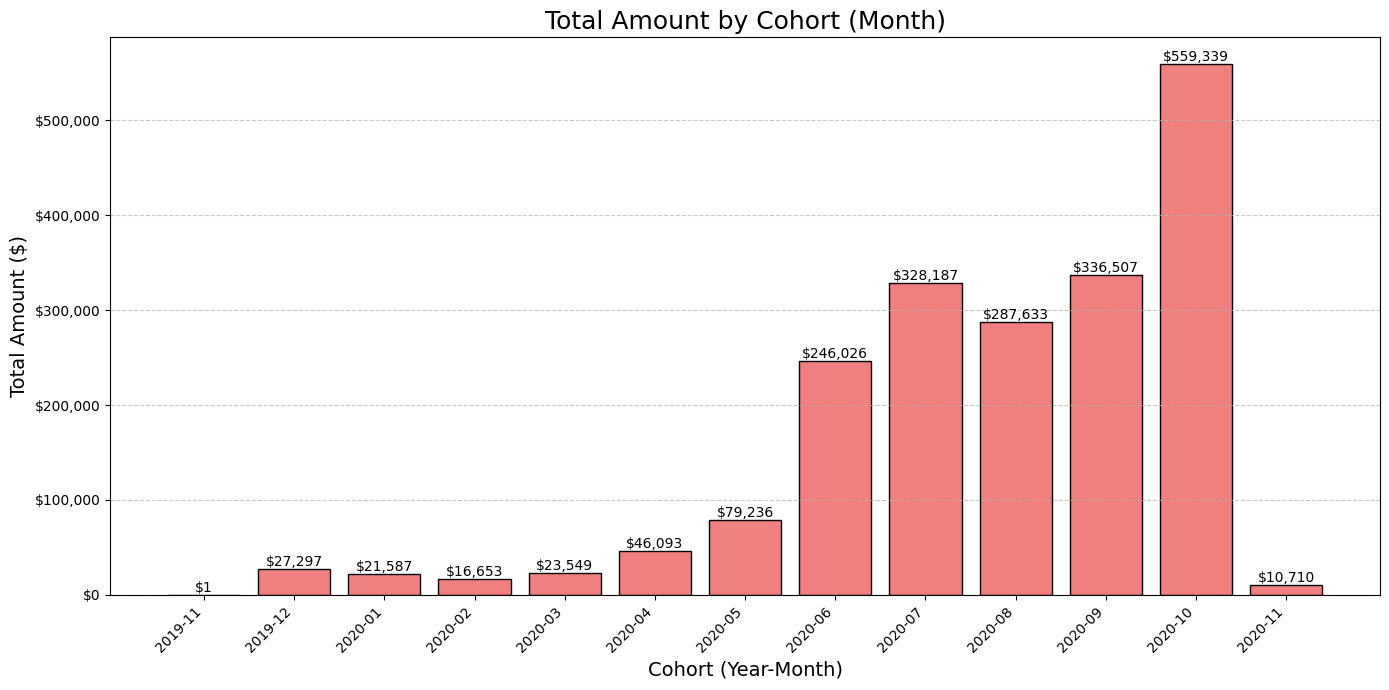

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from typing import Tuple

def frequency_of_use(
    cash_request_df: pd.DataFrame,
    show_plots: bool = True
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Analyzes and visualizes the frequency and total amount of cash advance requests by monthly cohorts.

    Parameters:
    - cash_request_df (pd.DataFrame): 
        df containing cash advance request data with at least the following columns:
            - 'created_at' (datetime ISO 8601 format): The date when the cash advance request was created.
            - 'id' (any): A unique identifier for each request.
            - 'amount' (float or int): The monetary amount requested.
    - show_plots (bool): 
        If True, generates bar plots for total requests and total amount per cohort, default  True.

    Returns:
    - Tuple[pd.DataFrame, pd.DataFrame]: 
        1. **cohort_counts** (pd.DataFrame): 
            - 'cohort' (str): year and month of the cohort in 'YYYY-MM' format.
            - 'cash_request_count' (int):total number of cash advance requests in the cohort.
        2. **cohort_amounts** (pd.DataFrame): 
            - 'cohort' (str): year and month of the cohort in 'YYYY-MM' format.
            - 'Total Amount' (float): total amount requested in the cohort.

    Raises:
    - KeyError: 
        If required columns ('created_at', 'id', 'amount') are missing from the input df.
    - ValueError: 
        If 'created_at' contains invalid date entries that cannot be converted to datetime.
    """
    # Define required columns
    required_columns = {'created_at', 'id', 'amount'}

    # Validate input DataFrame
    if not required_columns.issubset(cash_request_df.columns):
        missing = required_columns - set(cash_request_df.columns)
        raise KeyError(f"Input df is missing required columns: {missing}")

    # make copy to avoid messing up the original df
    df = cash_request_df.copy()

    # maek sure 'created_at' is in datetime format
    df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
    if df['created_at'].isnull().any():
        raise ValueError("Some 'created_at' entries could not be converted to datetime.")

    # Extract cohort (year and month) as 'YYYY-MM'
    df['cohort'] = df['created_at'].dt.to_period('M').astype(str)

    # Handle missing 'amount' values by filling with zero
    df['amount'] = df['amount'].fillna(0)

    # Group by cohort and count the number of requests
    cohort_counts = df.groupby('cohort').size().reset_index(name='cash_request_count')

    # Group by cohort and sum the total amount requested
    cohort_amounts = df.groupby('cohort')['amount'].sum().reset_index(name='Total Amount')

    # Sort the DataFrames by cohort chronologically
    cohort_counts = cohort_counts.sort_values('cohort').reset_index(drop=True)
    cohort_amounts = cohort_amounts.sort_values('cohort').reset_index(drop=True)

    # plot Total Requests by Cohort as Bar Plot

    if show_plots:
        plt.figure(figsize=(14, 7))
        bars = plt.bar(cohort_counts['cohort'], cohort_counts['cash_request_count'], color='skyblue', edgecolor='black')

        # top each bar with the count
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f'{height}',
                ha='center',
                va='bottom',
                fontsize=10,
                color='black'
            )

        # titles and labels
        plt.title('Total Requests by Cohort (Month)', fontsize=18)
        plt.xlabel('Cohort (Year-Month)', fontsize=14)
        plt.ylabel('Total Requests', fontsize=14)
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
        plt.tight_layout()
        plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal gridlines for better readability
        plt.show()

        # plot Total Amount by Cohort as Bar Plot
        plt.figure(figsize=(14, 7))
        bars = plt.bar(cohort_amounts['cohort'], cohort_amounts['Total Amount'], color='lightcoral', edgecolor='black')

        # top of each bar with the total amount in $
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f'${height:,.0f}',
                ha='center',
                va='bottom',
                fontsize=10,
                color='black'
            )

        # y-axis labels w/ $
        plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

        # titles and labels
        plt.title('Total Amount by Cohort (Month)', fontsize=18)
        plt.xlabel('Cohort (Year-Month)', fontsize=14)
        plt.ylabel('Total Amount ($)', fontsize=14)
        plt.xticks(rotation=45, ha='right')  # rotate x-axis labels for readability
        plt.tight_layout()
        plt.grid(axis='y', linestyle='--', alpha=0.7)  # horizontal gridlines for readability
        plt.show()

    return cohort_counts, cohort_amounts


cohort_counts, cohort_amounts = frequency_of_use(cash_request_df)


C:\Users\dbigman\AppData\Local\Temp\ipykernel_11012\199739046.py:54: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['cohort'] = df['created_at'].dt.to_period('M').astype(str)


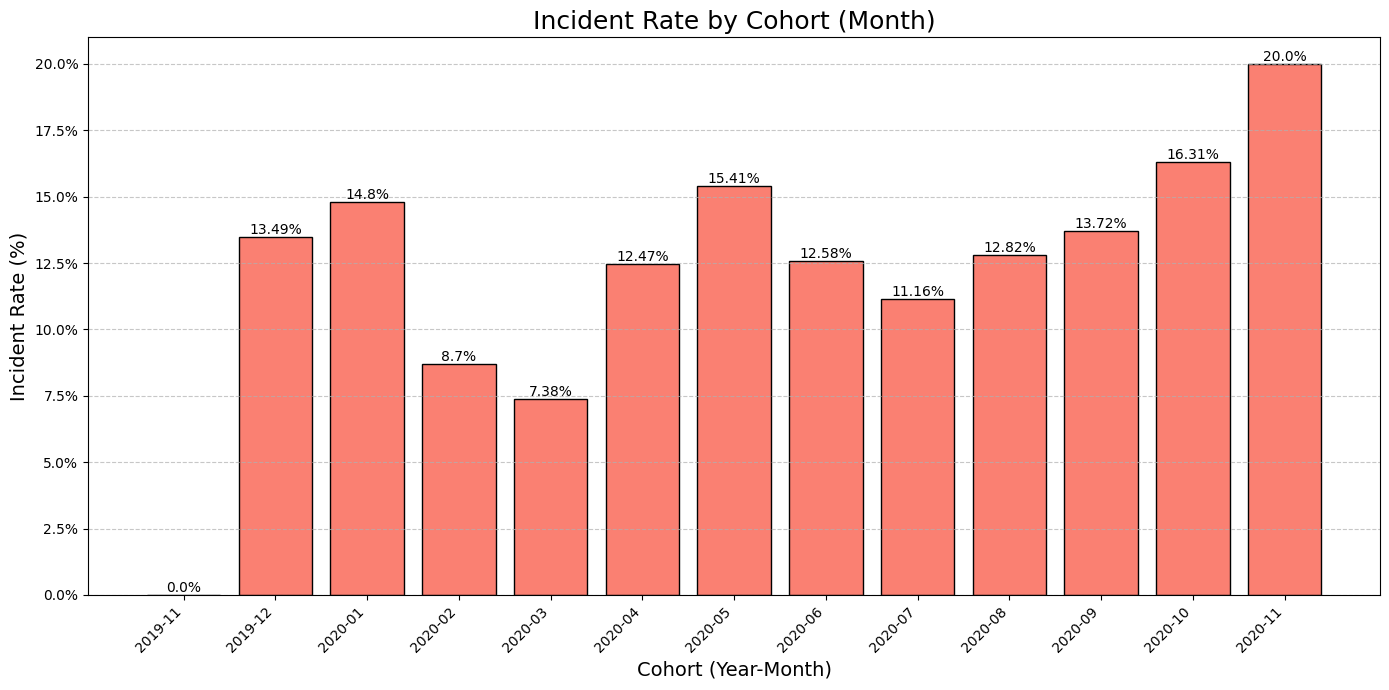

In [132]:
def incident_rate(cash_request_df: pd.DataFrame, incident_indicators) -> pd.Series:
    """
    Incident Rate: Determine the incident rate, specifically focusing on payment incidents, for each cohort.
    Identify if there are variations in incident rates among different cohorts.

    Parameters:
    - cash_request_df (pd.DataFrame): 
        DataFrame containing cash advance request data with at least the following columns:
            - 'created_at' (str or datetime-like): The date when the cash advance request was created.
            - 'recovery_status' (any): The status indicating recovery or incident (e.g., 'Recovered', None).

    Returns:
    - pd.Series: 
        Series indexed by 'cohort' with incident rates (%) rounded to two decimal places.
    """
    # Convert 'created_at' to datetime if it's not already
    cash_request_df['created_at'] = pd.to_datetime(cash_request_df['created_at'], errors='coerce')
    
    # Handle potential NaT values after conversion
    if cash_request_df['created_at'].isnull().any():
        raise ValueError("Some 'created_at' entries could not be converted to datetime.")
    
    # Extract cohort (year and month) as 'YYYY-MM'
    cash_request_df['cohort'] = cash_request_df['created_at'].dt.strftime('%Y-%m')
    
    # Calculate number of incidents per cohort
    # Assuming that NaN in 'recovery_status' indicates an incident
    incident_per_cohort = cash_request_df[cash_request_df['recovery_status'].isin(incident_indicators)] \
        .groupby('cohort')['recovery_status'] \
        .count() \
        .reset_index(name='Incidents')
                    
    # Get total requests per cohort using frequency_of_use function. Turn off plots. 
    cash_request_per_cohort_count = frequency_of_use(cash_request_df, show_plots=False)
    
    # Merge the two DataFrames on 'cohort'
    merged = pd.merge(cash_request_per_cohort_count[0], incident_per_cohort, on='cohort', how='left')
    
    # Replace NaN incidents with 0 (in case there are cohorts with no incidents)
    merged['Incidents'] = merged['Incidents'].fillna(0)
    
    # Calculate incident rate percentage
    merged['Incident_Rate (%)'] = (merged['Incidents'] / merged['cash_request_count']) * 100
    
    # Round to two decimal places
    merged['Incident_Rate (%)'] = merged['Incident_Rate (%)'].round(2)
    
    # Optional: Plotting the incident rates
    plt.figure(figsize=(14, 7))
    bars = plt.bar(merged['cohort'], merged['Incident_Rate (%)'], color='salmon', edgecolor='black')
    
    # Annotate each bar with the incident rate
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height}%',
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )
    
    # Format y-axis labels to include %
    plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x}%'))
    
    # Add titles and labels
    plt.title('Incident Rate by Cohort (Month)', fontsize=18)
    plt.xlabel('Cohort (Year-Month)', fontsize=14)
    plt.ylabel('Incident Rate (%)', fontsize=14)
    plt.xticks(rotation=45, ha='right')  
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7) 
    plt.show()
    
    # Set 'cohort' as index and return the incident rates
    incident_by_cohort_ratio = merged.set_index('cohort')['Incident_Rate (%)']
    
    return incident_by_cohort_ratio

incident_indicators = ['cancelled',  'completed', 'pending', 'pending_direct_debit'] 

cash_request_incident_rate = incident_rate(cash_request_df, incident_indicators=incident_indicators)


<Figure size 1400x700 with 0 Axes>

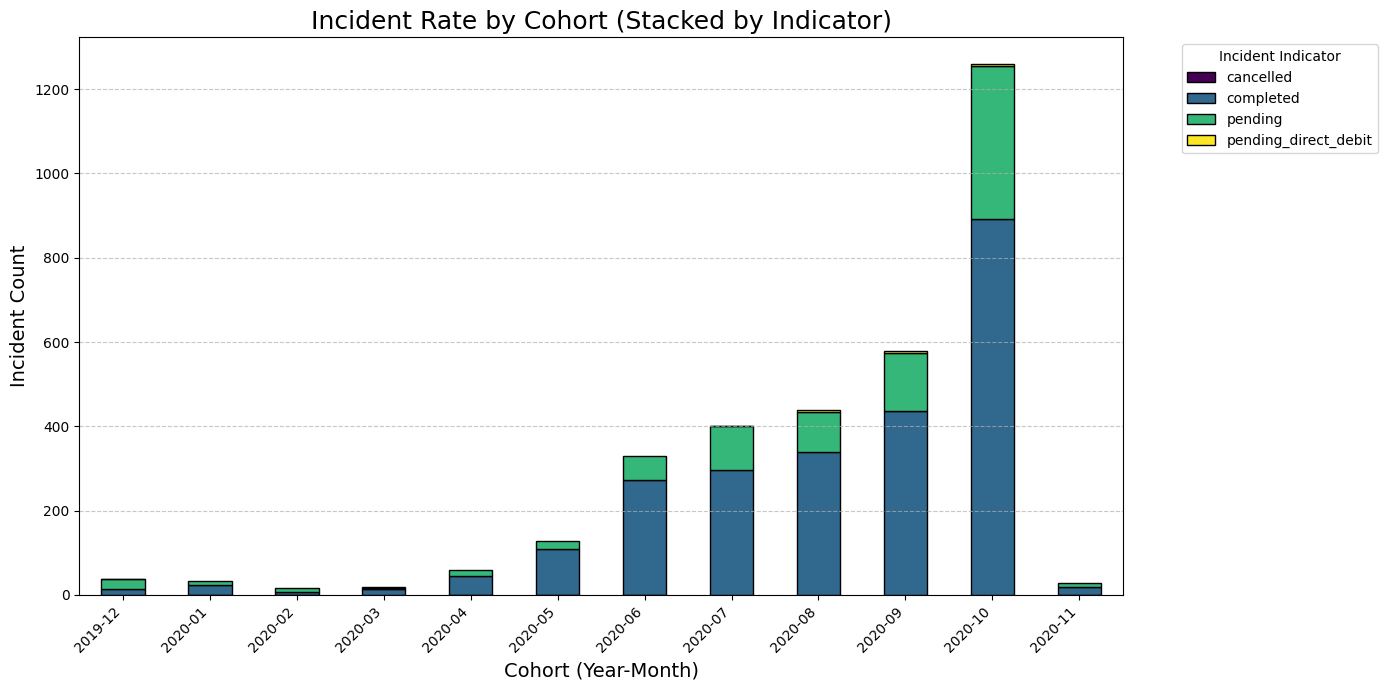

recovery_status  cancelled  completed  pending  pending_direct_debit
cohort                                                              
2019-12                  0         14       24                     1
2020-01                  0         24        9                     0
2020-02                  0          6       10                     0
2020-03                  0         15        2                     1
2020-04                  0         45       14                     0
2020-05                  0        110       19                     0
2020-06                  0        272       57                     0
2020-07                  0        297      104                     1
2020-08                  0        339       95                     4
2020-09                  0        436      139                     4
2020-10                  1        890      364                     5
2020-11                  0         20        8                     0


In [133]:
def incident_rate_stacked(cash_request_df: pd.DataFrame, incident_indicators) -> pd.DataFrame:
    """
    Incident Rate: Determine the incident rate for each cohort with a focus on different incident indicators.
    Generate a stacked bar chart showing the proportion of each indicator per cohort.

    Parameters:
    - cash_request_df (pd.DataFrame): 
        DataFrame containing cash advance request data with at least the following columns:
            - 'created_at' (str or datetime-like): The date when the cash advance request was created.
            - 'recovery_status' (any): The status indicating recovery or incident (e.g., 'Recovered', None).
    - incident_indicators (list): List of incident indicators to include in the analysis.

    Returns:
    - pd.DataFrame: 
        DataFrame with the count of each incident indicator per cohort.
    """
    # Convert 'created_at' to datetime if it's not already
    cash_request_df['created_at'] = pd.to_datetime(cash_request_df['created_at'], errors='coerce')
    
    # Handle potential NaT values after conversion
    if cash_request_df['created_at'].isnull().any():
        raise ValueError("Some 'created_at' entries could not be converted to datetime.")
    
    # Extract cohort (year and month) as 'YYYY-MM'
    cash_request_df['cohort'] = cash_request_df['created_at'].dt.strftime('%Y-%m')
    
    # Filter data for the specified incident indicators
    filtered_df = cash_request_df[cash_request_df['recovery_status'].isin(incident_indicators)]
    
    # Group by cohort and recovery_status to calculate counts
    incidents_by_indicator = (
        filtered_df.groupby(['cohort', 'recovery_status'])
        .size()
        .unstack(fill_value=0)  # Pivot the recovery_status column
    )
    
    # Add missing columns for any incident indicators not in the data
    for indicator in incident_indicators:
        if indicator not in incidents_by_indicator.columns:
            incidents_by_indicator[indicator] = 0

    # Reorder columns to match the order of incident_indicators
    incidents_by_indicator = incidents_by_indicator[incident_indicators]
    
    # Plot the stacked bar chart
    plt.figure(figsize=(14, 7))
    incidents_by_indicator.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis', edgecolor='black')
    
    # Add labels and title
    plt.title('Incident Rate by Cohort (Stacked by Indicator)', fontsize=18)
    plt.xlabel('Cohort (Year-Month)', fontsize=14)
    plt.ylabel('Incident Count', fontsize=14)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.legend(title='Incident Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal gridlines
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
    return incidents_by_indicator


incident_counts_by_cohort = incident_rate_stacked(cash_request_df, incident_indicators)

# Display the DataFrame
print(incident_counts_by_cohort)

### Data Cleaning and Formatting

Firstly, we convert the date columns, which are stored as a string in the dataframe, to actual date format (ISO 8601)

In [134]:
# Converting date columns to datetime format in cash_request_df
cash_request_df['created_at'] = pd.to_datetime(cash_request_df['created_at'])
cash_request_df['updated_at'] = pd.to_datetime(cash_request_df['updated_at'])
cash_request_df['moderated_at'] = pd.to_datetime(cash_request_df['moderated_at'], errors='coerce')
cash_request_df['reimbursement_date'] = pd.to_datetime(cash_request_df['reimbursement_date'], errors='coerce', utc=True)
cash_request_df['cash_request_received_date'] = pd.to_datetime(cash_request_df['cash_request_received_date'], errors='coerce')  # Handle invalid dates
cash_request_df['money_back_date'] = pd.to_datetime(cash_request_df['money_back_date'], errors='coerce')
cash_request_df['send_at'] = pd.to_datetime(cash_request_df['send_at'], errors='coerce')
cash_request_df['reco_creation'] = pd.to_datetime(cash_request_df['reco_creation'], errors='coerce')
cash_request_df['reco_last_update'] = pd.to_datetime(cash_request_df['reco_last_update'], errors='coerce')

In [135]:
# Converting date columns to datetime format in fees_df
fees_df['created_at'] = pd.to_datetime(fees_df['created_at'])
fees_df['updated_at'] = pd.to_datetime(fees_df['updated_at'])
fees_df['paid_at'] = pd.to_datetime(fees_df['paid_at'], errors='coerce')  # Handle invalid dates
fees_df['from_date'] = pd.to_datetime(fees_df['from_date'], errors='coerce')
fees_df['to_date'] = pd.to_datetime(fees_df['to_date'], errors='coerce')

Then we check if there are duplicates in `cash_request_df` and `fees_df`. We also checked the missing values for each column in both dataframes. 

In [136]:
# Check for duplicates in cash_request_df
print(cash_request_df.duplicated().sum())

# Check for duplicates in fees_df
print(fees_df.duplicated().sum())


0
0


In [137]:
# Check missing values in both datasets
print(cash_request_df.isnull().sum())  # Check for missing values in cash_request_df
print(fees_df.isnull().sum())  # Check for missing values in fees_df

id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   8058
deleted_account_id            21866
reimbursement_date            20920
cash_request_received_date     7681
money_back_date               11930
transfer_type                     0
send_at                        7504
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
cohort                            0
dtype: int64
id                     0
cash_request_id        4
type                   0
status                 0
category           18865
total_amount           0
reason                 0
created_at             0
updated_at             0
paid_at             5623
from_date          14312
to_date            14549
charge_moment          0
dtype: int64


Deciding to Fill or Drop Missing Values in Other Columns (in `cash_request_df`, code box below):

1. moderated_at:

    * Purpose: This column likely represents when a request was moderated. While important for understanding processing timing, it is not critical for defining cohorts or tracking service usage frequency.

    * Decision: Fill with NaT (Not a Time). This ensures that users without a moderation date can still be included in the analysis without disrupting cohort creation.

2. reimbursement_date:

    * Purpose: This date likely tracks when a user was reimbursed. While it is important for understanding the lifecycle of a cash advance, it does not affect cohort creation or the frequency of service usage.

    * Decision: Fill with NaT. If a reimbursement hasn't occurred yet, it’s fine to treat missing values as NaT without removing the row.

3. money_back_date:

    * Purpose: This column likely tracks when a user paid back the loan or cash advance. While important for analyzing repayment behavior, it is not related to cohort creation.

    * Decision: Fill with NaT. If the repayment date is missing, it can be treated as NaT without affecting the analysis of the cohorts or the frequency of service usage.

4. send_at:

    * Purpose: This column likely tracks when the funds were sent. While relevant for understanding the full process of cash advances, it is not directly related to cohort definition or service usage frequency.

    * Decision: Fill with NaT. If a send date is missing, it can be treated as NaT without affecting the overall analysis.

Summary of Decisions for Handling Missing Data in cash_request_df:

* Critical Columns for Cohort Creation:

    * Drop rows with missing user_id and cash_request_received_date because they are essential for tracking cohorts.

* Fill with NaT:

    * For columns like moderated_at, reimbursement_date, money_back_date, and send_at, fill missing values with NaT. These columns do not affect the cohort definition but might be important for other analyses.

In [138]:
# Fill missing values in 'moderated_at' with NaT (Not a Time) to retain rows with missing moderation dates
cash_request_df['moderated_at'] = cash_request_df['moderated_at'].fillna(pd.NaT)

# Fill missing values in 'reimbursement_date' with NaT (Not a Time) to keep rows with missing reimbursement dates
cash_request_df['reimbursement_date'] = cash_request_df['reimbursement_date'].fillna(pd.NaT)

# Fill missing values in 'money_back_date' with NaT (Not a Time) for rows with no repayment date
cash_request_df['money_back_date'] = cash_request_df['money_back_date'].fillna(pd.NaT)

# Fill missing values in 'send_at' with NaT (Not a Time) to retain rows with missing send dates
cash_request_df['send_at'] = cash_request_df['send_at'].fillna(pd.NaT)


Deciding to Fill or Drop Missing Values in Other Columns (in `fees_df`):

1. cash_request_id:

    * Purpose: This column links each fee to a specific cash request. It’s essential for associating fees with requests.
    * Decision: Drop rows with missing cash_request_id. Without a cash_request_id, a fee cannot be linked to a cash request, and thus, the data would be meaningless for analysis.

2. category:

    * Purpose: This column likely describes the reason for the fee (e.g., late fee, processing fee, etc.). It is important for understanding fee incidents and calculating the incident rate.

    * Decision: Fill missing category values with "Unknown". Missing category values might indicate fees with unrecorded reasons. Filling with "Unknown" ensures that all rows are retained for analysis without losing information.

3. paid_at:

    * Purpose: This column represents when the fee was paid. It’s important for analyzing when fees were settled, but not necessarily for cohort definition.

    * Decision: Fill missing paid_at values with NaT (Not a Time). Missing paid_at could indicate that the fee hasn’t been paid yet, so filling it with NaT ensures that the row stays in the dataset and can still be analyzed for incident rates and revenue, but without assuming it has been paid.

4. from_date and to_date:

    * Purpose: These columns likely represent the start and end date of the fee’s validity period. For analyzing fee periods or calculating durations, these dates are important.

    * Decision: Fill missing from_date and to_date values with NaT. Missing dates could indicate an unknown period, but rather than dropping these rows, filling them with NaT ensures the data remains in the dataset and is not lost.

In [139]:
# Drop rows with missing cash_request_id because fees without a cash request are irrelevant
fees_df = fees_df.dropna(subset=['cash_request_id'])

# Fill missing category values with 'Unknown' because it helps retain all fees in the dataset
fees_df['category'] = fees_df['category'].fillna('Unknown')

# Fill missing paid_at values with NaT, as fees might not have been paid yet
fees_df['paid_at'] = fees_df['paid_at'].fillna(pd.NaT)

# Fill missing from_date and to_date with NaT, as missing dates might not affect the overall analysis
fees_df['from_date'] = fees_df['from_date'].fillna(pd.NaT)
fees_df['to_date'] = fees_df['to_date'].fillna(pd.NaT)


#### Check

Below we Check the first few rows to see if missing values were handled properly.

* **The missing values in critical columns (user_id and cash_request_received_date) were successfully handled by dropping rows with missing values.**

* Non-critical columns (e.g., moderated_at, reimbursement_date, money_back_date, send_at) were correctly filled with NaT, and no unexpected issues are visible.

* The dataset is now ready for cohort definition and metric calculations.

In [140]:
# Check the first few rows to see if missing values were handled properly
print(cash_request_df.head())

     id  amount    status                       created_at  \
0     5   100.0  rejected 2019-12-10 19:05:21.596873+00:00   
1    70   100.0  rejected 2019-12-10 19:50:12.347780+00:00   
2     7   100.0  rejected 2019-12-10 19:13:35.825460+00:00   
3    10    99.0  rejected 2019-12-10 19:16:10.880172+00:00   
4  1594   100.0  rejected 2020-05-06 09:59:38.877376+00:00   

                        updated_at  user_id                     moderated_at  \
0 2019-12-11 16:47:42.407830+00:00    804.0 2019-12-11 16:47:42.405646+00:00   
1 2019-12-11 14:24:22.900054+00:00    231.0 2019-12-11 14:24:22.897988+00:00   
2 2019-12-11 09:46:59.779773+00:00    191.0 2019-12-11 09:46:59.777728+00:00   
3 2019-12-18 14:26:18.136163+00:00    761.0 2019-12-18 14:26:18.128407+00:00   
4 2020-05-07 09:21:55.340080+00:00   7686.0 2020-05-07 09:21:55.320193+00:00   

   deleted_account_id               reimbursement_date  \
0                 NaN 2020-01-09 19:05:21.596363+00:00   
1                 NaN 2020-01-

We do the same for `fees_df`. 

* The missing values in critical columns (e.g., cash_request_id and category) were handled correctly by dropping or filling them.

* The non-critical date columns (paid_at, from_date, to_date) were filled with NaT, which is appropriate for handling missing dates.

* The dataset is ready for further analysis, including cohort definition and calculation of key metrics.

In [141]:
# Check the first few rows to see if missing values were handled properly
print(fees_df.head())

      id  cash_request_id             type    status               category  \
0   6537          14941.0  instant_payment  rejected                Unknown   
1   6961          11714.0         incident  accepted  rejected_direct_debit   
2  16296          23371.0  instant_payment  accepted                Unknown   
3  20775          26772.0  instant_payment  accepted                Unknown   
4  11242          19350.0  instant_payment  accepted                Unknown   

   total_amount                              reason  \
0           5.0  Instant Payment Cash Request 14941   
1           5.0               rejected direct debit   
2           5.0  Instant Payment Cash Request 23371   
3           5.0  Instant Payment Cash Request 26772   
4           5.0  Instant Payment Cash Request 19350   

                        created_at                       updated_at  \
0 2020-09-07 10:47:27.423150+00:00 2020-10-13 14:25:09.396112+00:00   
1 2020-09-09 20:51:17.998653+00:00 2020-10-13 14:25:

* The missing values in critical columns (e.g., cash_request_id and category) were handled correctly by dropping or filling them.

* The non-critical date columns (paid_at, from_date, to_date) were filled with NaT, which is appropriate for handling missing dates.

* The dataset is ready for further analysis, including cohort definition and calculation of key metrics.

### Cohorts
The main objective is to analyze user cohorts defined by the month of creation of their first cash advance. We created the `cash2` dataframe, which is just a copy of the original dataframe. Then, we changed the datatype of `created_at` to a date format and identified the first cash request for each user, whether they had an active account or not. Each user was assigned to the cohort of the first month they used the service. 

Finally, we displayed the how many users belong to each cohort (sorted by quantity and not by date), revise that the dataframe has been modified correctly, and count that no record has been removed. 

The primary cohort definition is based on the month in which a user made their first cash request (cash_request_received_date).

Cohort Grouping: Each user is assigned to a cohort based on the month they made their first cash advance request.

* Example: If a user made their first request in January 2023, they belong to the January 2023 cohort.
    
* Another user who made their first request in February 2023 will belong to the February 2023 cohort.

Why Cohorts are Important in This Project:

1. **Frequency of Service Usage**: By analyzing cohorts over time, it’s possible to track how often users from each cohort utilize IronHack Payments' services.

2. **Incident Rate**: Understanding how often payment incidents (e.g., payment failures) occur in each cohort helps assess whether certain cohorts have higher incident rates than others.

3. **Revenue Generation**: Tracking the total revenue generated by each cohort helps assess the financial impact of different user groups over time.

4. **New Relevant Metric**: A new metric (like user retention or churn) can be applied to cohorts to further analyze user behavior.

In [142]:
cash2 = cash_request_df.copy()
# Convert 'created_at' to datetime
# cash2['created_at'] = pd.to_datetime(cash2['created_at'])

# Create a unified identifier that includes both 'user_id' and 'deleted_account_id'
cash2['identifier'] = cash2['user_id'].combine_first(cash2['deleted_account_id'])

# Identify the first cash request date for each identifier
cash2['first_cash_request'] = cash2.groupby('identifier')['created_at'].transform('min')


cash2['first_cash_request'] = cash2['first_cash_request'].dt.to_period('M')

# Assign users to cohorts based on the first cash request date
cash2['cohort_month'] = cash2['first_cash_request']

# Filter the data to include only the first appearance of each identifier
first_appearance = cash2[cash2['created_at'] == cash2['first_cash_request']]

# Display the cohort sizes
cohort_sizes = first_appearance.groupby('cohort_month')['identifier'].nunique()

display(cash2['cohort_month'].value_counts())
display(cash2.head())
print(len(cash2))
print(len(cash_request_df))

C:\Users\dbigman\AppData\Local\Temp\ipykernel_11012\604324560.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash2['first_cash_request'] = cash2['first_cash_request'].dt.to_period('M')


cohort_month
2020-06    5266
2020-10    5058
2020-07    4147
2020-09    2925
2020-05    1660
2020-08    1632
2019-12    1080
2020-04     952
2020-02     441
2020-03     371
2020-01     354
2020-11      76
2019-11       8
Freq: M, Name: count, dtype: int64

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort,identifier,first_cash_request,cohort_month
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.407830+00:00,804.0,2019-12-11 16:47:42.405646+00:00,NaN,2020-01-09 19:05:21.596363+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12,804.0,2019-12,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00:00,231.0,2019-12-11 14:24:22.897988+00:00,NaN,2020-01-09 19:50:12.347780+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12,231.0,2019-12,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00:00,191.0,2019-12-11 09:46:59.777728+00:00,NaN,2020-01-09 19:13:35.825041+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12,191.0,2019-12,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00:00,761.0,2019-12-18 14:26:18.128407+00:00,NaN,2020-01-09 19:16:10.879606+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12,761.0,2019-12,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.340080+00:00,7686.0,2020-05-07 09:21:55.320193+00:00,NaN,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT,2020-05,7686.0,2020-05,2020-05


23970
23970


Explanation:

* dt.to_period('M'): This converts the cash_request_received_date to a period, grouping the users based on the month and year of their first cash request.

* This will create a new column cohort_month in cash_request_df that indicates the cohort each user belongs to.

In [143]:
# Display the first few rows showing user_id, cash_request_received_date, and the assigned cohort_month
print(cash2[['user_id', 'cash_request_received_date', 'cohort_month']].head())

   user_id cash_request_received_date cohort_month
0    804.0                        NaT      2019-12
1    231.0                        NaT      2019-12
2    191.0                        NaT      2019-12
3    761.0                        NaT      2019-12
4   7686.0                        NaT      2020-05


Explanation:

* This code shows the first few rows of the columns user_id, cash_request_received_date, and cohort_month to verify that users have been correctly assigned to cohorts based on the month of their first cash request.

    * user_id: The unique identifier for each user.

    * cash_request_received_date: The date when each user made their first cash request.

    * cohort_month: The cohort that the user belongs to, based on the month and year of their first cash request.

In [144]:
# Group by cohort_month and user_id, then count the number of requests made by each user
cohort_usage = cash2.groupby(['cohort_month', 'user_id']).size().unstack(fill_value=0)

# Transpose to see cohorts as rows
cohort_usage = cohort_usage.T

# Display the frequency of service usage for each cohort
print(cohort_usage.head())

cohort_month  2019-11  2019-12  2020-01  2020-02  2020-03  2020-04  2020-05  \
user_id                                                                       
34.0                0        0        0        0        0        1        0   
35.0                0        7        0        0        0        0        0   
47.0                8        0        0        0        0        0        0   
52.0                0        4        0        0        0        0        0   
53.0                0        4        0        0        0        0        0   

cohort_month  2020-06  2020-07  2020-08  2020-09  2020-10  2020-11  
user_id                                                             
34.0                0        0        0        0        0        0  
35.0                0        0        0        0        0        0  
47.0                0        0        0        0        0        0  
52.0                0        0        0        0        0        0  
53.0                0        0  

Explanation of Output:

* Rows: Each row corresponds to a user (identified by user_id).
Columns: Each column corresponds to a cohort month (e.g., 2020-01, 2020-02, etc.).

* Values: The values in the table represent the number of requests made by each user in each cohort. 

### Charts

#### Frequency of service usage
*Understand how often users from each cohort utilize IronHack Payments' cash advance services over time.*

For easier visualization of the previous summary, we created a chart. Here, we can identify more rapidly that users of the *2020-06* cohort were the users that most frequently utilized the service. 

c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


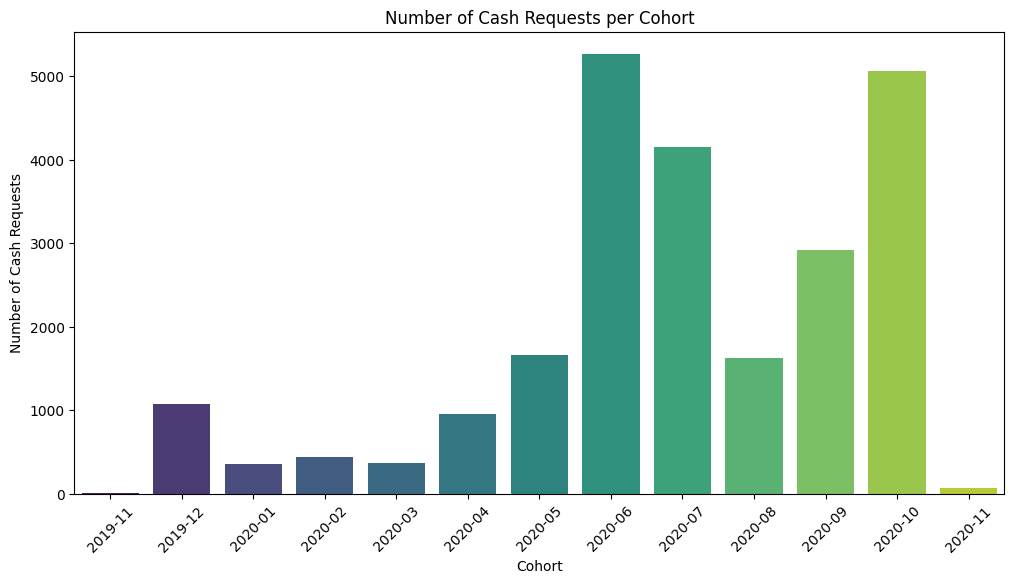

In [145]:
cohort_counts = cash2.groupby("cohort_month")["created_at"].count().reset_index()

# Rename columns for clarity
cohort_counts.columns = ['cohort_month', 'count']

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=cohort_counts, x='cohort_month', y='count', palette='viridis')
plt.xlabel('Cohort')
plt.ylabel('Number of Cash Requests')
plt.title('Number of Cash Requests per Cohort')
plt.xticks(rotation=45)
plt.show()

Graph Analysis:

* Early Cohorts (2019-12 to 2020-05):

    * The graph shows low service usage in the initial months, indicating that the service was likely new or had limited adoption. These cohorts represent a small group of users who started using the service during these early periods, possibly due to limited awareness or availability.

* Sudden Growth in June 2020:

    * There is a sharp rise in June 2020, showing a substantial increase in service usage. This indicates a rapid expansion in user engagement or demand for the service, likely due to factors such as increased marketing, better brand recognition, or growing market acceptance.

* Other peak in October 2020:

    * The peak in October 2020 represents a high level of activity across the cohorts. This could indicate that the service reached its maximum usage during this period, which may have been driven by successful promotional campaigns, word-of-mouth, or significant demand spikes.

* Decline in November 2020:

    * The sharp drop in service usage in November 2020 could suggest a seasonal decline, market saturation, or changes in user behavior (e.g., users not needing the service as frequently). This could also be influenced by external events such as economic factors or changes in the service offering.

Key Insights:

* Service Adoption: The steady increase in service usage from June 2020 onward shows that users are becoming more engaged with the service over time. This suggests positive growth for the company in terms of user base and usage frequency.

* Cohort Engagement: Later cohorts are far more active than earlier cohorts, which could be a sign that the service has been optimized or better suited to user needs as time progresses.

* Potential Seasonality: The drop in November 2020 raises questions about whether this is due to seasonal factors or temporary market conditions.

#### Incident Rate
*Determine the incident rate, specifically focusing on payment incidents, for each cohort. Identify if there are variations in incident rates among different cohorts.*

For identifying the incident rate, the `recovery_status` column from `cash2` was used. We counted the number of incidents per cohort and put them in a table-like format.

In [146]:
cash2.groupby("cohort_month")["recovery_status"].count()

cohort_month
2019-11      0
2019-12    130
2020-01     36
2020-02     37
2020-03     44
2020-04    143
2020-05    232
2020-06    655
2020-07    536
2020-08    170
2020-09    450
2020-10    884
2020-11     13
Freq: M, Name: recovery_status, dtype: int64

But for easier visualization, we created a chart. We can observe that most issues occured to people from the `2020-10` cohort. 

c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


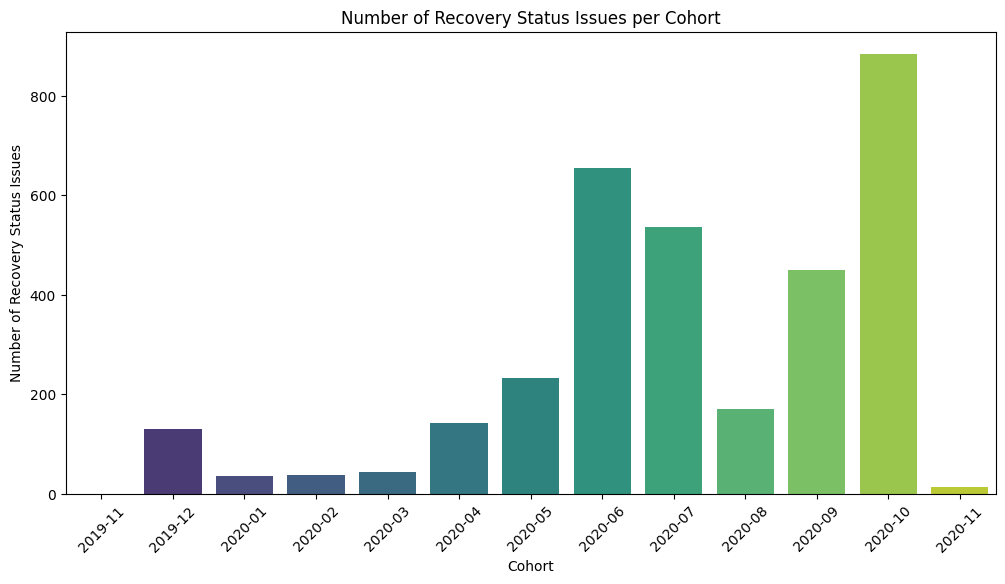

In [147]:
recovery_status_counts = cash2.groupby("cohort_month")["recovery_status"].count().reset_index()

# Rename columns for clarity
recovery_status_counts.columns = ['cohort_month', 'count']

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=recovery_status_counts, x='cohort_month', y='count', palette='viridis')
plt.xlabel('Cohort')
plt.ylabel('Number of Recovery Status Issues')
plt.title('Number of Recovery Status Issues per Cohort')
plt.xticks(rotation=45)
plt.show()

In this chart we cannot visualize the types of error per cohort. We put them in a table and made a chart for it too. 

In [148]:
cash2.groupby("cohort_month")["recovery_status"].value_counts()

cohort_month  recovery_status     
2019-12       completed                88
              pending                  40
              pending_direct_debit      2
2020-01       completed                25
              pending                  11
2020-02       completed                28
              pending                   9
2020-03       completed                40
              pending                   4
2020-04       completed               108
              pending                  34
              pending_direct_debit      1
2020-05       completed               192
              pending                  40
2020-06       completed               523
              pending                 131
              pending_direct_debit      1
2020-07       completed               387
              pending                 147
              pending_direct_debit      2
2020-08       completed               123
              pending                  45
              pending_direct_debit      2

c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype

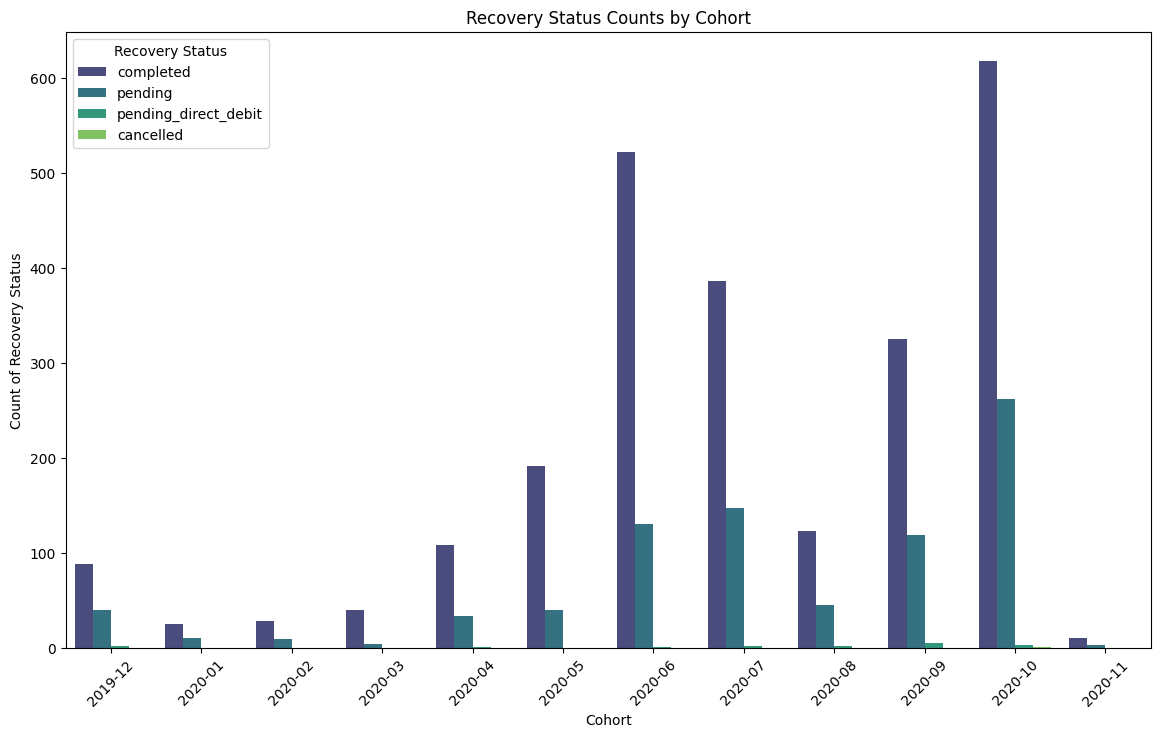

In [149]:
recovery_status_counts = cash2.groupby(["cohort_month", "recovery_status"]).size().reset_index(name='count')

# Create the grouped bar chart
plt.figure(figsize=(14, 8))
sns.barplot(data=recovery_status_counts, x='cohort_month', y='count', hue='recovery_status', palette='viridis')
plt.xlabel('Cohort')
plt.ylabel('Count of Recovery Status')
plt.title('Recovery Status Counts by Cohort')
plt.xticks(rotation=45)
plt.legend(title='Recovery Status')
plt.show()

Now, we show the incidents as rates in a table and also as in a barchart: 

cohort_month
2019-11    0.000000
2019-12    0.120370
2020-01    0.101695
2020-02    0.083900
2020-03    0.118598
2020-04    0.150210
2020-05    0.139759
2020-06    0.124383
2020-07    0.129250
2020-08    0.104167
2020-09    0.153846
2020-10    0.174773
2020-11    0.171053
Freq: M, Name: created_at, dtype: float64


c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


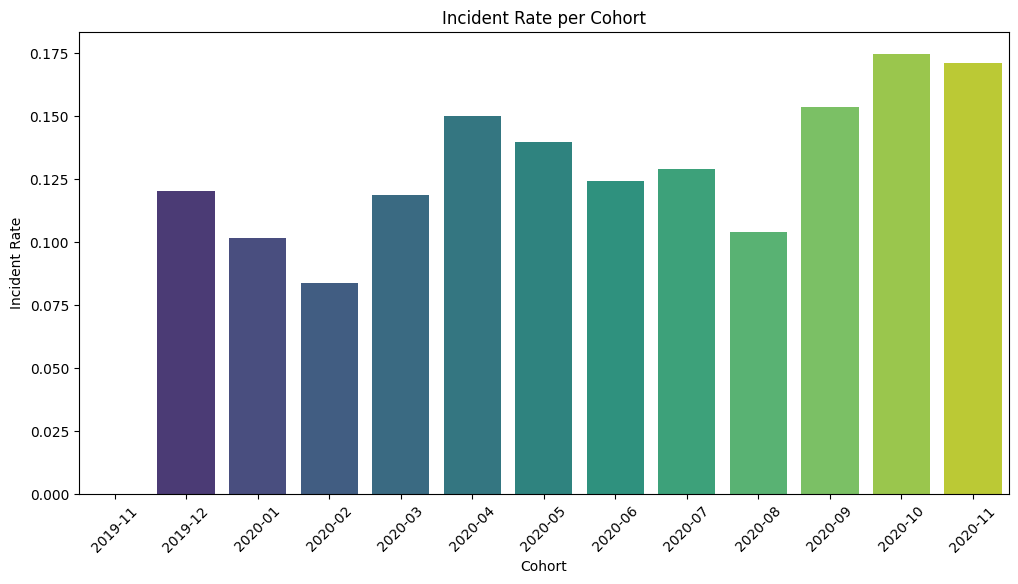

In [150]:
# Identify payment incidents (e.g., recovery_status being 'pending', 'pending_direct_debit', or 'completed')
payment_incidents = cash2[cash2['recovery_status'].isin(['pending', 'pending_direct_debit', 'completed', 'cancelled'])]

# Count total requests per cohort
total_requests_per_cohort = cash2.groupby('cohort_month')['created_at'].count()

# Count payment incidents per cohort
incidents_per_cohort = payment_incidents.groupby('cohort_month')['created_at'].count()

# Calculate incident rate per cohort
incident_rate_per_cohort = (incidents_per_cohort / total_requests_per_cohort).fillna(0)

# Display the incident rate per cohort
print(incident_rate_per_cohort)

# Plot the incident rate per cohort
incident_rate_df = incident_rate_per_cohort.reset_index()
incident_rate_df.columns = ['cohort_month', 'incident_rate']

plt.figure(figsize=(12, 6))
sns.barplot(data=incident_rate_df, x='cohort_month', y='incident_rate', palette='viridis')
plt.xlabel('Cohort')
plt.ylabel('Incident Rate')
plt.title('Incident Rate per Cohort')
plt.xticks(rotation=45)
plt.show()

From every chart, we observe that most issues were on the `2020-10` cohort. 

#### Revenue generated by the cohorts
*Calculate the total revenue generated by each cohort over months to assess the financial impact of user behavior.*

After merging the fees and cash requests tables, we can calculate the total fees for each cohort.

In [151]:
table = fees_df.merge(cash2, left_on="cash_request_id", right_on="id" , how="inner")
print(table.columns)

table.head()

Index(['id_x', 'cash_request_id', 'type', 'status_x', 'category',
       'total_amount', 'reason', 'created_at_x', 'updated_at_x', 'paid_at',
       'from_date', 'to_date', 'charge_moment', 'id_y', 'amount', 'status_y',
       'created_at_y', 'updated_at_y', 'user_id', 'moderated_at',
       'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update',
       'cohort', 'identifier', 'first_cash_request', 'cohort_month'],
      dtype='object')


,id_x,cash_request_id,type,status_x,category,total_amount,reason,created_at_x,updated_at_x,paid_at,...,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort,identifier,first_cash_request,cohort_month
0,6537,14941.0,instant_payment,rejected,Unknown,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.423150+00:00,2020-10-13 14:25:09.396112+00:00,2020-12-17 14:50:07.470110+00:00,...,NaT,instant,2020-09-14 10:46:57.735172+00:00,pending,2020-10-11 22:52:52.274832+00:00,2020-12-20 22:40:42.556534+00:00,2020-09,35661.0,2020-09,2020-09
1,12732,14941.0,incident,rejected,rejected_direct_debit,5.0,rejected direct debit,2020-10-11 22:52:52.278237+00:00,2020-10-13 14:25:18.698050+00:00,2020-12-17 14:50:07.500818+00:00,...,NaT,instant,2020-09-14 10:46:57.735172+00:00,pending,2020-10-11 22:52:52.274832+00:00,2020-12-20 22:40:42.556534+00:00,2020-09,35661.0,2020-09,2020-09
2,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00:00,2020-10-13 14:25:15.537063+00:00,2020-12-08 17:13:10.459080+00:00,...,2020-12-02 03:02:41.180953+00:00,instant,2020-08-17 13:15:54.290998+00:00,completed,2020-09-09 20:51:17.992852+00:00,2020-10-10 22:58:13.306027+00:00,2020-08,16158.0,2020-06,2020-06
3,3293,11714.0,instant_payment,accepted,Unknown,5.0,Instant Payment Cash Request 11714,2020-08-10 14:58:20.324765+00:00,2020-10-13 14:25:02.659654+00:00,2020-12-08 17:13:10.415287+00:00,...,2020-12-02 03:02:41.180953+00:00,instant,2020-08-17 13:15:54.290998+00:00,completed,2020-09-09 20:51:17.992852+00:00,2020-10-10 22:58:13.306027+00:00,2020-08,16158.0,2020-06,2020-06
4,12578,11714.0,incident,accepted,month_delay_on_payment,5.0,month delay on payment - 10/2020,2020-10-10 23:26:31.632893+00:00,2020-10-13 14:25:03.353131+00:00,2020-12-08 17:13:10.481169+00:00,...,2020-12-02 03:02:41.180953+00:00,instant,2020-08-17 13:15:54.290998+00:00,completed,2020-09-09 20:51:17.992852+00:00,2020-10-10 22:58:13.306027+00:00,2020-08,16158.0,2020-06,2020-06


<Figure size 1400x700 with 0 Axes>

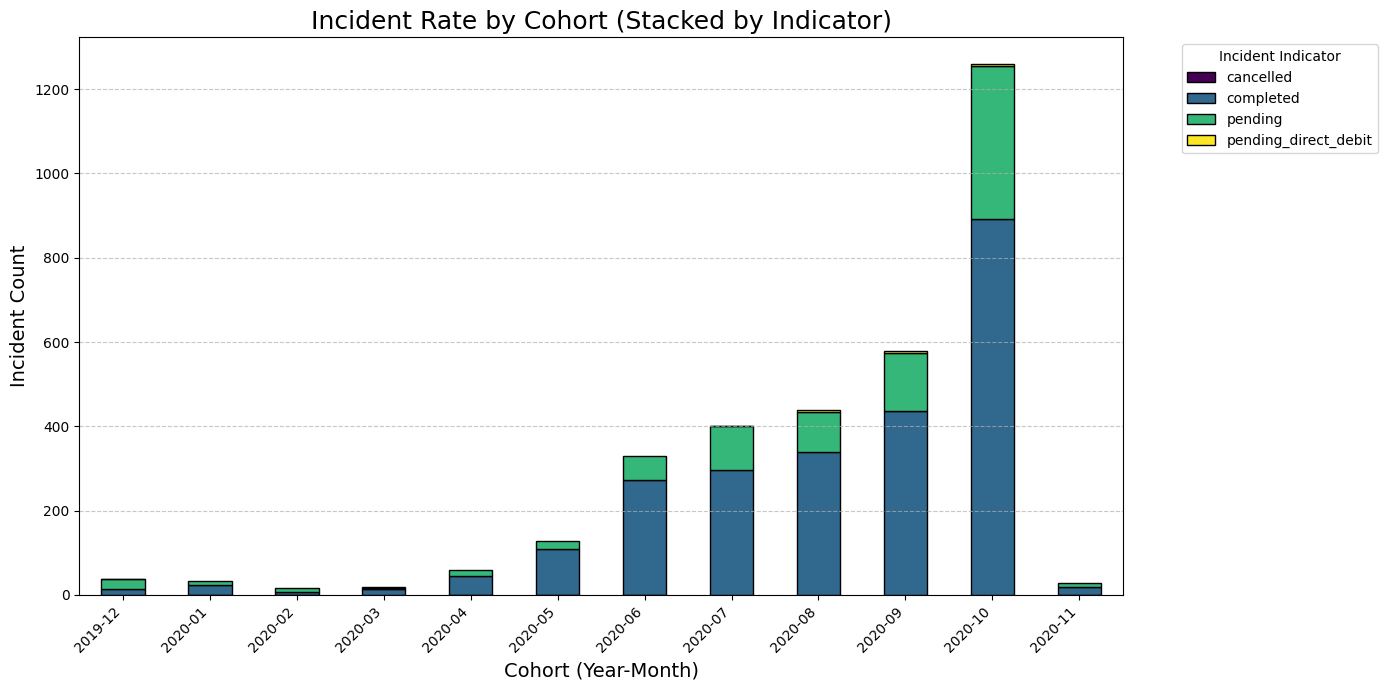

recovery_status  cancelled  completed  pending  pending_direct_debit
cohort                                                              
2019-12                  0         14       24                     1
2020-01                  0         24        9                     0
2020-02                  0          6       10                     0
2020-03                  0         15        2                     1
2020-04                  0         45       14                     0
2020-05                  0        110       19                     0
2020-06                  0        272       57                     0
2020-07                  0        297      104                     1
2020-08                  0        339       95                     4
2020-09                  0        436      139                     4
2020-10                  1        890      364                     5
2020-11                  0         20        8                     0


In [152]:
def incident_rate_stacked(cash_request_df: pd.DataFrame, incident_indicators) -> pd.DataFrame:
    """
    Incident Rate: Determine the incident rate for each cohort with a focus on different incident indicators.
    Generate a stacked bar chart showing the proportion of each indicator per cohort.

    Parameters:
    - cash_request_df (pd.DataFrame): 
        DataFrame containing cash advance request data with at least the following columns:
            - 'created_at' (str or datetime-like): The date when the cash advance request was created.
            - 'recovery_status' (any): The status indicating recovery or incident (e.g., 'Recovered', None).
    - incident_indicators (list): List of incident indicators to include in the analysis.

    Returns:
    - pd.DataFrame: 
        DataFrame with the count of each incident indicator per cohort.
    """
    # Convert 'created_at' to datetime if it's not already
    cash_request_df['created_at'] = pd.to_datetime(cash_request_df['created_at'], errors='coerce')
    
    # Handle potential NaT values after conversion
    if cash_request_df['created_at'].isnull().any():
        raise ValueError("Some 'created_at' entries could not be converted to datetime.")
    
    # Extract cohort (year and month) as 'YYYY-MM'
    cash_request_df['cohort'] = cash_request_df['created_at'].dt.strftime('%Y-%m')
    
    # Filter data for the specified incident indicators
    filtered_df = cash_request_df[cash_request_df['recovery_status'].isin(incident_indicators)]
    
    # Group by cohort and recovery_status to calculate counts
    incidents_by_indicator = (
        filtered_df.groupby(['cohort', 'recovery_status'])
        .size()
        .unstack(fill_value=0)  # Pivot the recovery_status column
    )
    
    # Add missing columns for any incident indicators not in the data
    for indicator in incident_indicators:
        if indicator not in incidents_by_indicator.columns:
            incidents_by_indicator[indicator] = 0

    # Reorder columns to match the order of incident_indicators
    incidents_by_indicator = incidents_by_indicator[incident_indicators]
    
    # Plot the stacked bar chart
    plt.figure(figsize=(14, 7))
    incidents_by_indicator.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis', edgecolor='black')
    
    # Add labels and title
    plt.title('Incident Rate by Cohort (Stacked by Indicator)', fontsize=18)
    plt.xlabel('Cohort (Year-Month)', fontsize=14)
    plt.ylabel('Incident Count', fontsize=14)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.legend(title='Incident Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal gridlines
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
    return incidents_by_indicator


incident_counts_by_cohort = incident_rate_stacked(cash_request_df, incident_indicators)

# Display the DataFrame
print(incident_counts_by_cohort)

Definition of Revenue Generated:

Revenue in this context is the total amount of fees collected by IronHack Payments from all fee types associated with cash requests over time. The fee types that contribute to the generated revenue include:

1. Instant Payment Fees:

These fees are associated with cash requests that are processed immediately and involve SEPA Instant Payment.

2. Split Payment Fees:

These are future fees generated when users opt to split the reimbursement into installments.

3. Incident Fees (Payment Incidents):

These fees are generated when a direct debit fails (rejected direct debit), and they are classified as incident fees in the dataset. This category directly reflects revenue from payment failures.

4. Postpone Fees:

Fees are applied when a user delays their reimbursement date for a cash request.

Thus, generated revenue is the sum of total_amount for all fee types (instant_payment, split_payment, incident, and postpone) for each cohort of users.

A barchart shows indicates that most fees were charged in the `2020-10` cohort. 

cohort_month
2019-11       50.0
2020-11      335.0
2020-01      655.0
2020-03      870.0
2020-02      965.0
2019-12     1555.0
2020-04     2565.0
2020-05     5930.0
2020-08     7095.0
2020-09    16100.0
2020-07    17175.0
2020-06    22495.0
2020-10    29500.0
Freq: M, Name: total_amount, dtype: float64

c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dbigman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


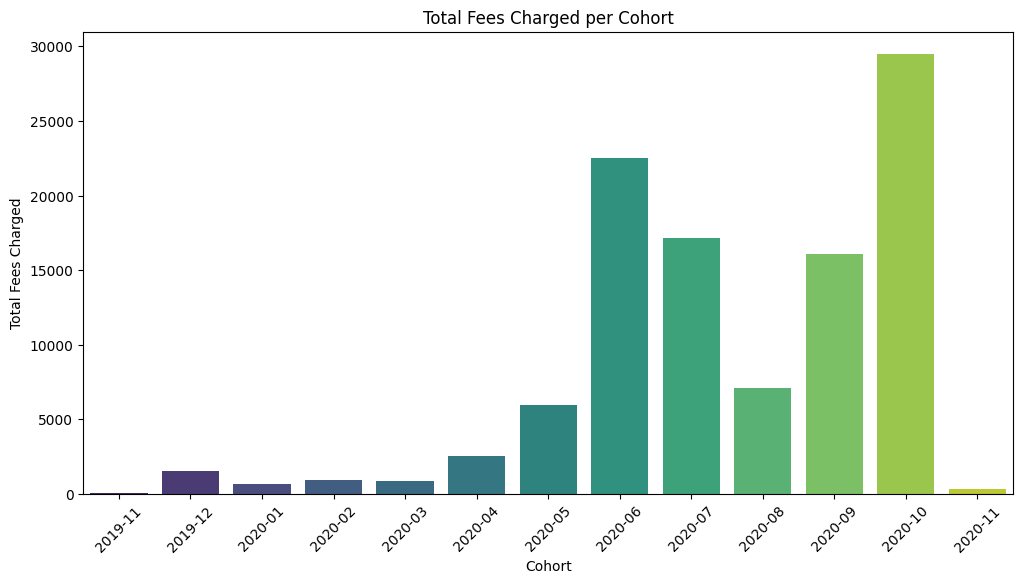

In [153]:
display(table.groupby("cohort_month")["total_amount"].sum().sort_values())

fees_by_cohort = table.groupby("cohort_month")["total_amount"].sum().reset_index()

# Sort the values for better visualization
# fees_by_cohort = fees_by_cohort.sort_values(by="total_amount")

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=fees_by_cohort, x='cohort_month', y='total_amount', palette='viridis')
plt.xlabel('Cohort')
plt.ylabel('Total Fees Charged')
plt.title('Total Fees Charged per Cohort')
plt.xticks(rotation=45)
plt.show()

Analyzing revenue generated by cohorts over time is crucial for understanding the financial impact of user behavior, especially in subscription-based or recurring revenue business models. By analyzing this in the context of the fees dataset, we can gain insights into how different user groups (cohorts) contribute to the business's financial performance.

Key Observations:

* There was a sharp increase in revenue starting from 2020-06 through 2020-10, with 2020-10 showing the highest revenue.

* The increase in revenue suggests that payment incidents, instant payment fees, or other fee types became more frequent starting around mid-2020, which might be worth investigating.

* The drop in 2020-11 might indicate fewer incidents or fees charged, or a reduction in cash requests during that period.

Insights:

* The higher revenue in later cohorts suggests that the company likely faced more payment incidents or more user activity that generated fees during 2020-06 to 2020-10.

* The initial low or zero revenue from earlier cohorts (2019-12 to 2020-04) could be due to fewer users or lower fee generation during those months.

#### New Relevant Metric: 
**Retention Rate by First Month Use**

Retention rate measures how many users from a given cohort continue to use IronHack Payments over time. For this case, we can calculate the retention rate by checking how many users from a cohort make a second, third, or subsequent payment after their initial loan. This will give us insight into how many users return after their first interaction with the service.

In [154]:
df = pd.read_csv("project_dataset/extract - fees - data analyst - .csv")

# Step 1: Ensure correct datetime conversion 
df['paid_at'] = pd.to_datetime(df['paid_at'], errors='coerce')  # Handle any parsing issues in 'paid_at'
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')  # Handle any parsing issues in 'created_at'

# Step 2: Calculate the first payment month for each user
# Remove timezone info before converting to Period (to suppress warnings)
df['payment_month'] = pd.to_datetime(df['paid_at']).dt.tz_localize(None).dt.to_period('M')

# Step 3: Determine the first use month (when the user first interacted with the service)
df['first_use_month'] = df.groupby('id')['created_at'].transform('min').dt.tz_localize(None).dt.to_period('M')

# Convert to string to ensure no Period objects
df['first_use_month'] = df['first_use_month'].astype(str)

# Step 4: Calculate the retention metric
# A user is considered retained if they paid after their first payment month
df['is_retained'] = (df['payment_month'] > df['first_use_month']).astype(int)

# Step 5: Group by 'first_use_month' and calculate the retention rate
retention_data = df.groupby(['first_use_month'])['is_retained'].mean().reset_index()

# Display the retention rate for each cohort
print(retention_data[['first_use_month', 'is_retained']])

  first_use_month  is_retained
0         2020-05     0.000000
1         2020-06     0.003901
2         2020-07     0.133416
3         2020-08     0.542923
4         2020-09     0.588364
5         2020-10     0.606260
6         2020-11     0.217228


Explanation:
1. **Identify First Use Month**: We use groupby('id')['created_at'].transform('min') to identify the first month each user used the service, and store this as first_use_month.
2. **Count Payments per User**: We group by id, payment_year, and payment_month to count the number of payments each user made. The size() function gives the count of payments per user per month.
3. **Track First Payment Month**: For each user, we track the earliest payment month using groupby('id')[\'payment_month\'].transform('min').
4. **Identify Retained Users**: We check if the current payment month is after the user's first payment month. If yes, it means the user returned for subsequent payments (and they are retained).
5. **Calculate Retention Rate**: We calculate the mean of is_retained for each cohort (first_use_month), which gives the retention rate for each cohort (the proportion of users who returned for at least one subsequent payment).

*For better visualization of the data, we turn these values into percentages.

In [155]:
# Percentages
retention_data['is_retained'] = (retention_data['is_retained'] * 100).round(2).astype(str) + '%'

# updated retention rate
print(retention_data[['first_use_month', 'is_retained']])

  first_use_month is_retained
0         2020-05        0.0%
1         2020-06       0.39%
2         2020-07      13.34%
3         2020-08      54.29%
4         2020-09      58.84%
5         2020-10      60.63%
6         2020-11      21.72%


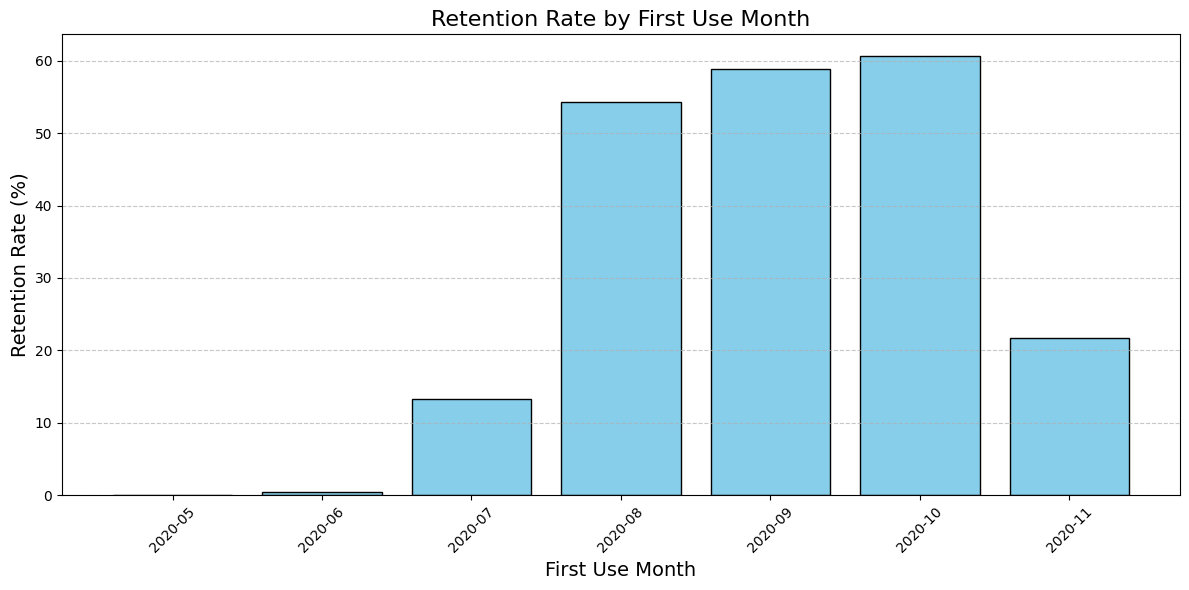

In [156]:
# Prepare data for plotting (convert retention rates back to numeric for visualization)
retention_data['is_retained_numeric'] = retention_data['is_retained'].str.rstrip('%').astype(float)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(retention_data['first_use_month'], retention_data['is_retained_numeric'], color='skyblue', edgecolor='black')
plt.title('Retention Rate by First Use Month', fontsize=16)
plt.xlabel('First Use Month', fontsize=14)
plt.ylabel('Retention Rate (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

A bar chart is effective for visualizing retention rates by cohort because it emphasizes the differences between cohorts.

*Why Is This Data Important?*

Retention Analysis: 
> Understanding user retention helps determine whether users find value in the service after their initial interaction.

Cohort Comparison: 
> By grouping users by their "first use month," you can see how user behavior changes over time and identify trends or problems with specific cohorts.

Business Insights: 
> Low retention may indicate problems with the service, while high retention suggests strong user satisfaction and engagement.

Informed Decision-Making: 
> Retention insights can guide strategies to improve user experience, reduce churn, or target high-value cohorts with marketing.

## Future Business Recommendations for Ironhack Payments:

As a data analyst, after performing the cohort analysis, retention rate analysis, and examining the revenue generated from cohorts, 
we can provide the company with several key recommendations to optimize business performance. Based on our findings, 
here are some possible recommendations:

1. Improve User Retention Strategies
Recommendation: If you observe significant drop-offs in retention over time (e.g., after the first month or after certain cohorts), 
you could recommend that the company invest in improving user engagement and retention strategies.

2. Targeted Marketing for High-Value Cohorts
Recommendation: Based on cohort revenue analysis, if certain cohorts generate more revenue over time, the company can increase 
marketing efforts targeting similar cohorts.

3. Address Payment Issues (Incidents)
Recommendation: If a significant number of users experience payment issues (failed or pending transactions), it’s crucial to address 
the payment process to reduce churn and improve revenue.




### Actionable Steps:

1. Improve User Retention Strategies:
- Implement targeted email campaigns, in-app messaging, or personalized offers to keep users engaged.
- Identify specific touchpoints where users tend to drop off and optimize the user experience around these points (e.g., onboarding process, first payment).
- Consider loyalty programs, discounts, or exclusive content for long-term users.
                                                            
2. Targeted Marketing for High-Value Cohorts
- Leverage user acquisition strategies focusing on characteristics of high-value cohorts (e.g., high-paying customers, frequent users).
- Expand marketing budgets for channels that perform well with higher-value cohorts.
- Use advanced segmentation and personalization to create tailored campaigns for these high-performing groups.
                                                                            
3. Address Payment Issues (Incidents)
- Investigate the root causes of payment incidents and streamline the payment process to reduce friction.
- Work with payment processors to ensure smoother transactions, such as better handling of failed payments and offering users alternative payment methods.
- Provide better communication and support to users facing payment issues, offering assistance to resolve payment problems quickly.

